In [3]:
# Always a bit risky, but I think the chance for name space convolution is small 
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
from plotnine import *
# Currently in a plotine dependancy they have deprication warning, so 
# we mute warnings to have a better experience
import warnings
warnings.filterwarnings("ignore")


# A nice color palette for categorical data 
cbPalette = ["#E69F00", "#56B4E9", "#009E73", 
             "#0072B2", "#D55E00", 
             "#CC79A7", "#F0E442", "#999999"]

# Proportions when saving figures 
BASE_HEIGHT = 5
BASE_WIDTH = 7.0

# Directory for saving figures
dir_save = "./Figs/"
if not os.path.isdir(dir_save):
    os.mkdir(dir_save)

# Process the rainbow desaturaed colormap into a format compatible with plotnine 
col_list_df = pd.read_csv("Data/Rainbow_desaturated.csv")
rainbow_desaturated = []
for i in range(col_list_df.shape[0]):
    rainbow_desaturated.append([col_list_df["R"][i], col_list_df["G"][i], col_list_df["B"][i]])

## Colours 

Let us start with looking at different colour maps and their feature extraction power.

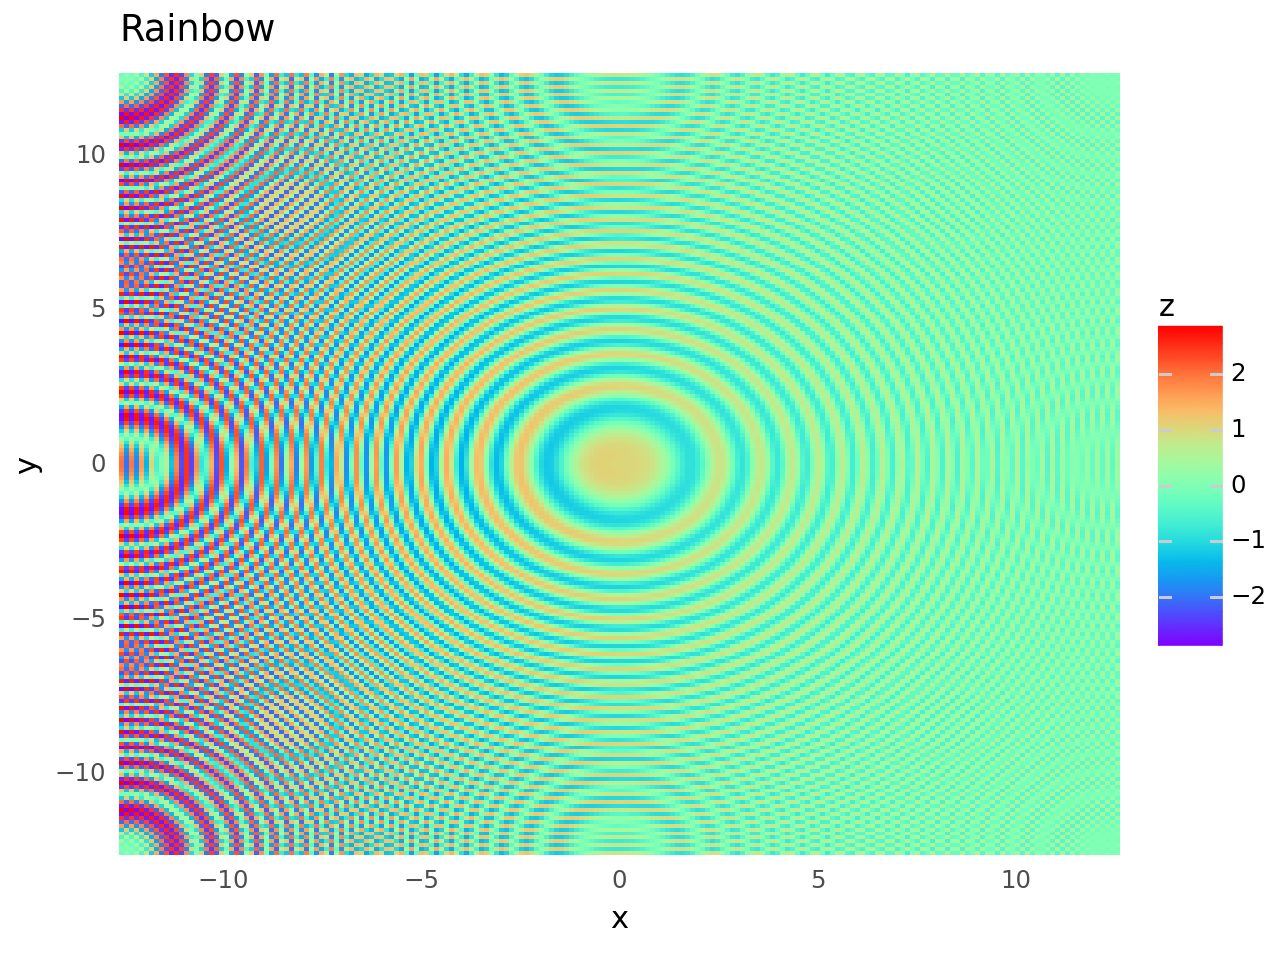

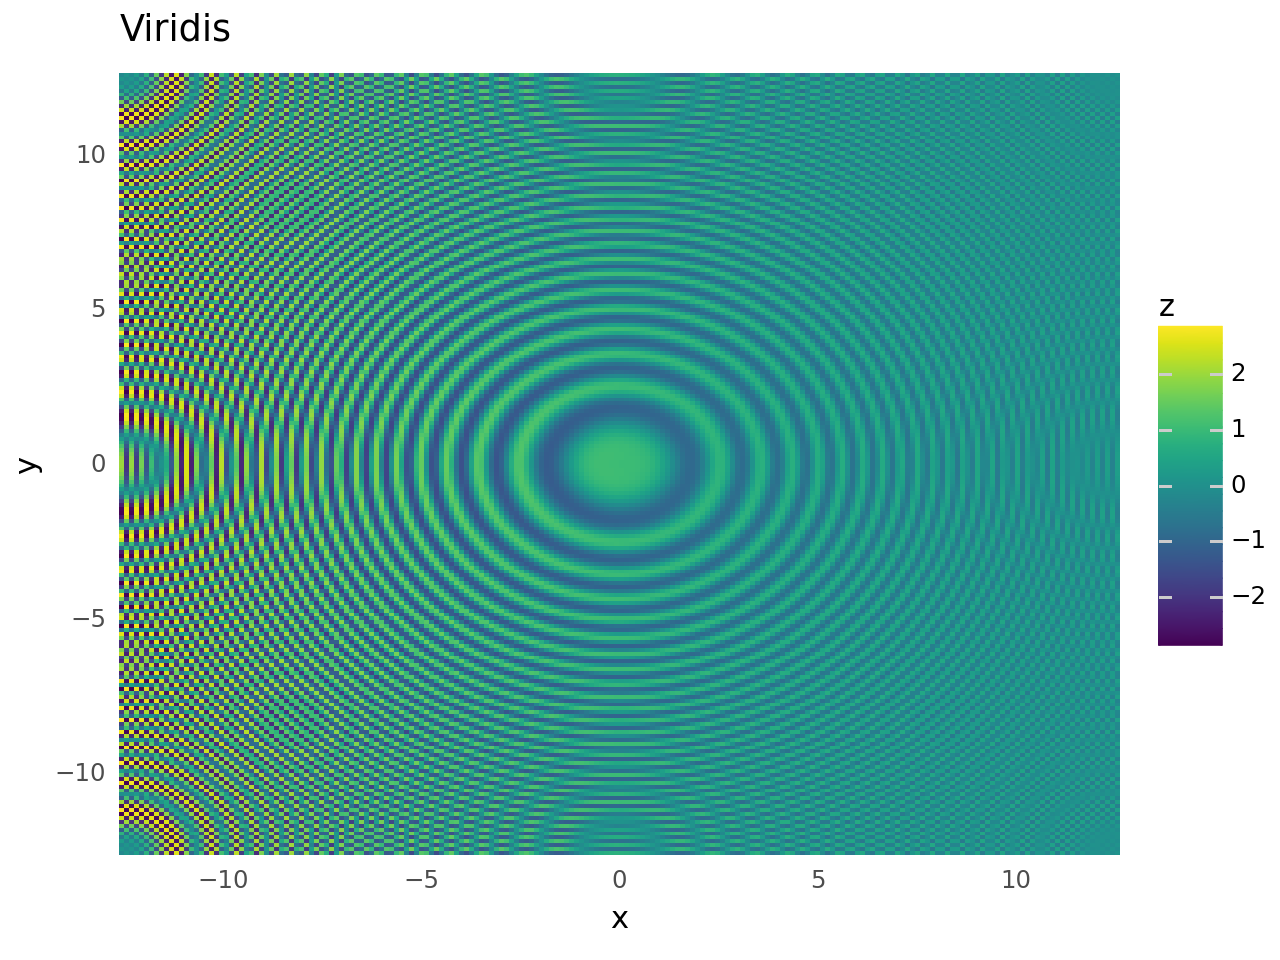

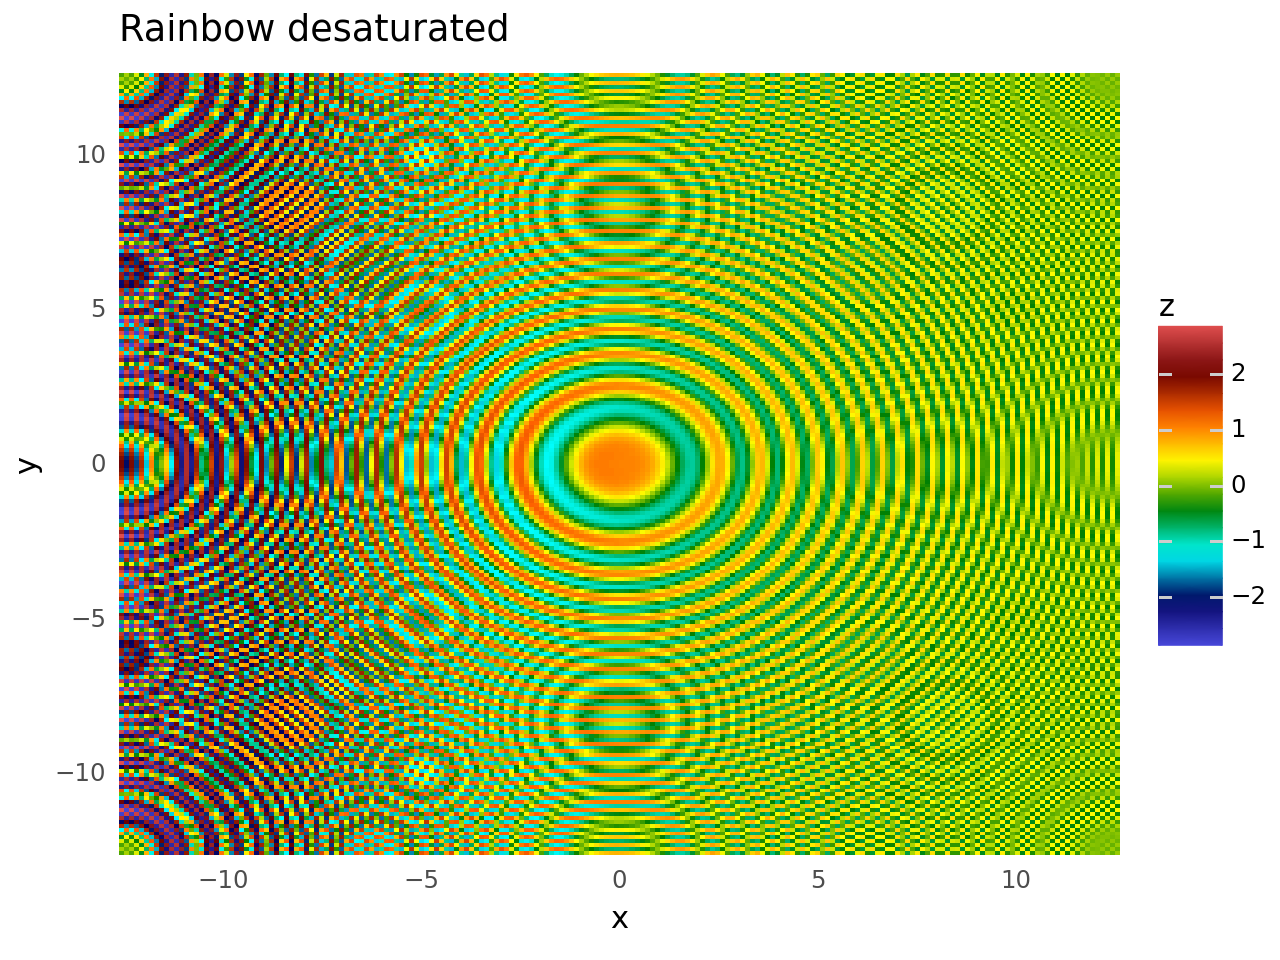

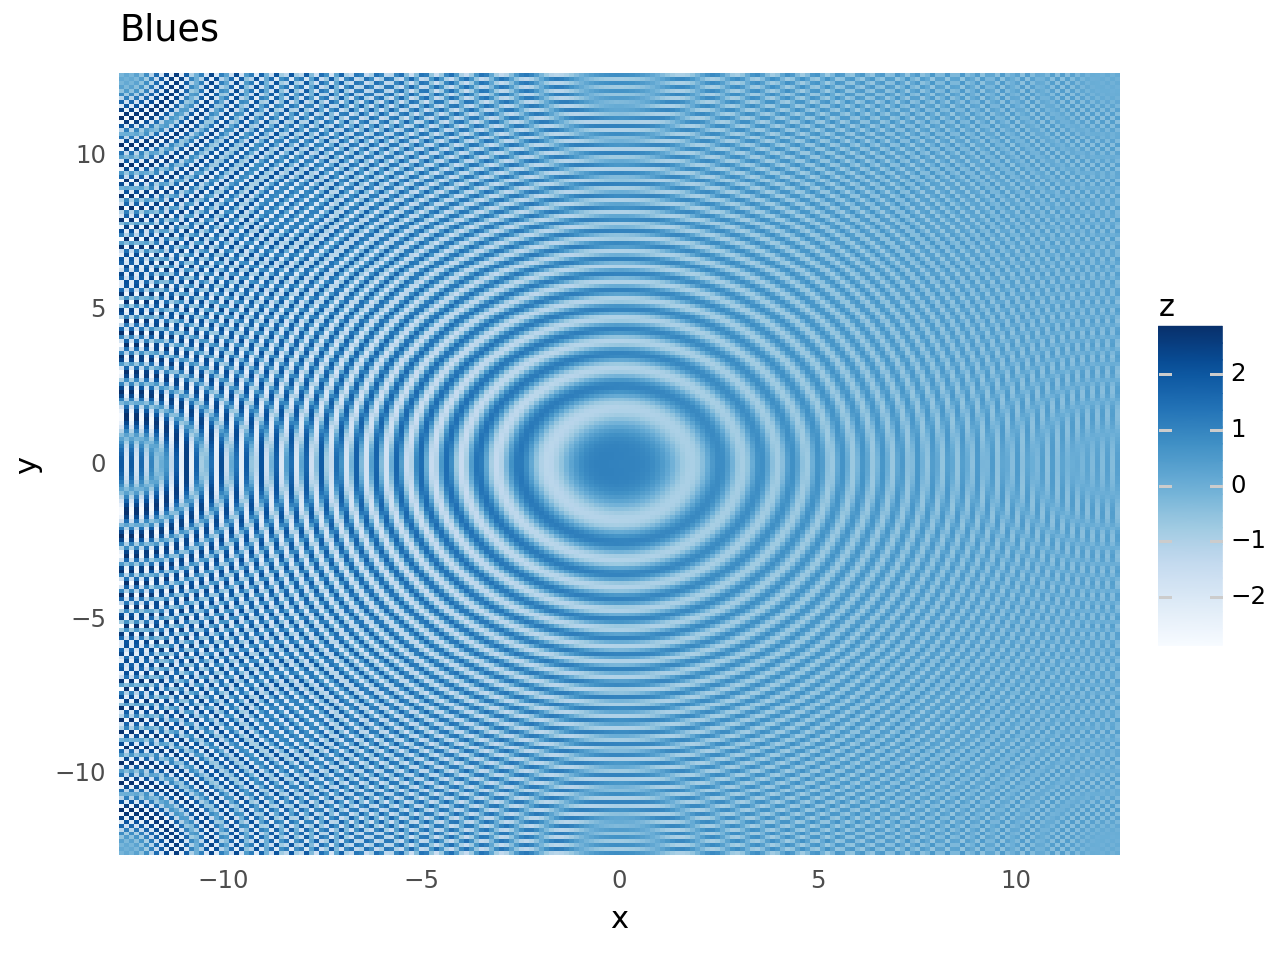

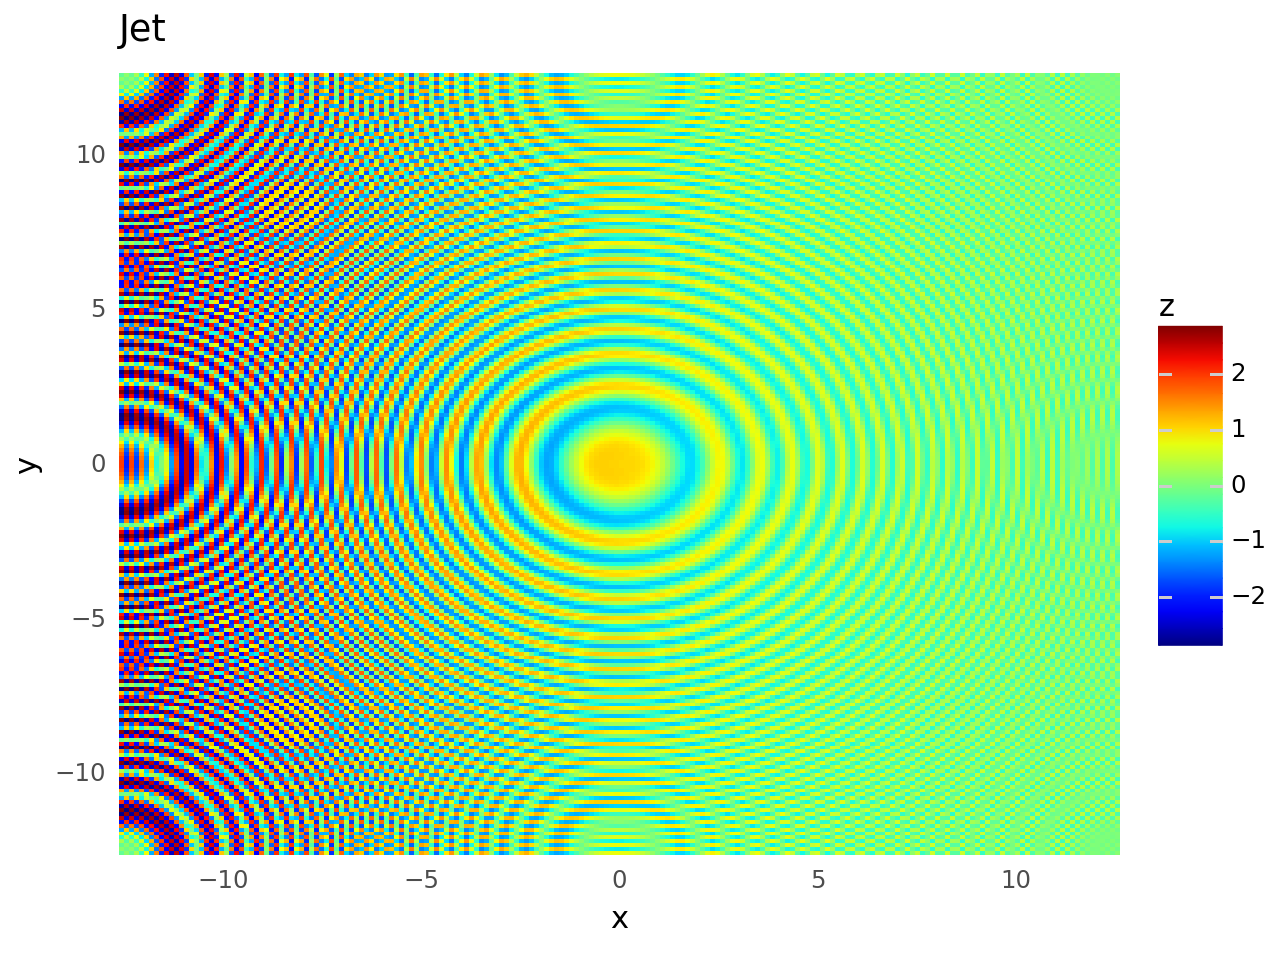

[<Figure Size: (640 x 480)>,
 <Figure Size: (640 x 480)>,
 <Figure Size: (640 x 480)>,
 <Figure Size: (640 x 480)>,
 <Figure Size: (640 x 480)>]

In [4]:
data_test_colormap = pd.read_csv("Data/Circles.csv")

p1 = (ggplot(data_test_colormap, aes('x', 'y', fill='z'))
    + geom_raster()
    + scale_fill_cmap("rainbow")
    + scale_x_continuous(expand=(0, 0)) 
    + scale_y_continuous(expand=(0, 0))
    + labs(title = "Rainbow")
    + theme_minimal())

p2 = (ggplot(data_test_colormap, aes('x', 'y', fill='z'))
    + geom_raster()
    + scale_fill_cmap("viridis")
    + scale_x_continuous(expand=(0, 0)) 
    + scale_y_continuous(expand=(0, 0))
    + labs(title = "Viridis")
    + theme_minimal())

p3 = (ggplot(data_test_colormap, aes('x', 'y', fill='z'))
    + geom_raster()
    + scale_fill_gradientn(colors=rainbow_desaturated)
    + scale_x_continuous(expand=(0, 0)) 
    + scale_y_continuous(expand=(0, 0))
    + labs(title = "Rainbow desaturated")
    + theme_minimal())


p4 = (ggplot(data_test_colormap, aes('x', 'y', fill='z'))
    + geom_raster()
    + scale_fill_cmap("Blues")
    + scale_x_continuous(expand=(0, 0)) 
    + scale_y_continuous(expand=(0, 0))
    + labs(title = "Blues")
    + theme_minimal())

p5 = (ggplot(data_test_colormap, aes('x', 'y', fill='z'))
    + geom_raster()
    + scale_fill_cmap("jet")
    + scale_x_continuous(expand=(0, 0)) 
    + scale_y_continuous(expand=(0, 0))
    + labs(title = "Jet")
    + theme_minimal())


p1.save("Figs/Circles_rainbow.png", dpi=300, width=BASE_WIDTH*1.1, height=BASE_WIDTH)
p2.save("Figs/Circles_viridis.png", dpi=300, width=BASE_WIDTH*1.1, height=BASE_WIDTH)
p3.save("Figs/Circles_desaturated.png", dpi=300, width=BASE_WIDTH*1.1, height=BASE_WIDTH)
p4.save("Figs/Circles_blues.png", dpi=300, width=BASE_WIDTH*1.1, height=BASE_WIDTH)
p5.save("Figs/Circles_jet.png", dpi=300, width=BASE_WIDTH*1.1, height=BASE_WIDTH)

[p1, p2, p3, p4, p5]

We see that the desaturated rainbow palette is great a feature extraction, however, it does not impose any sense of size;

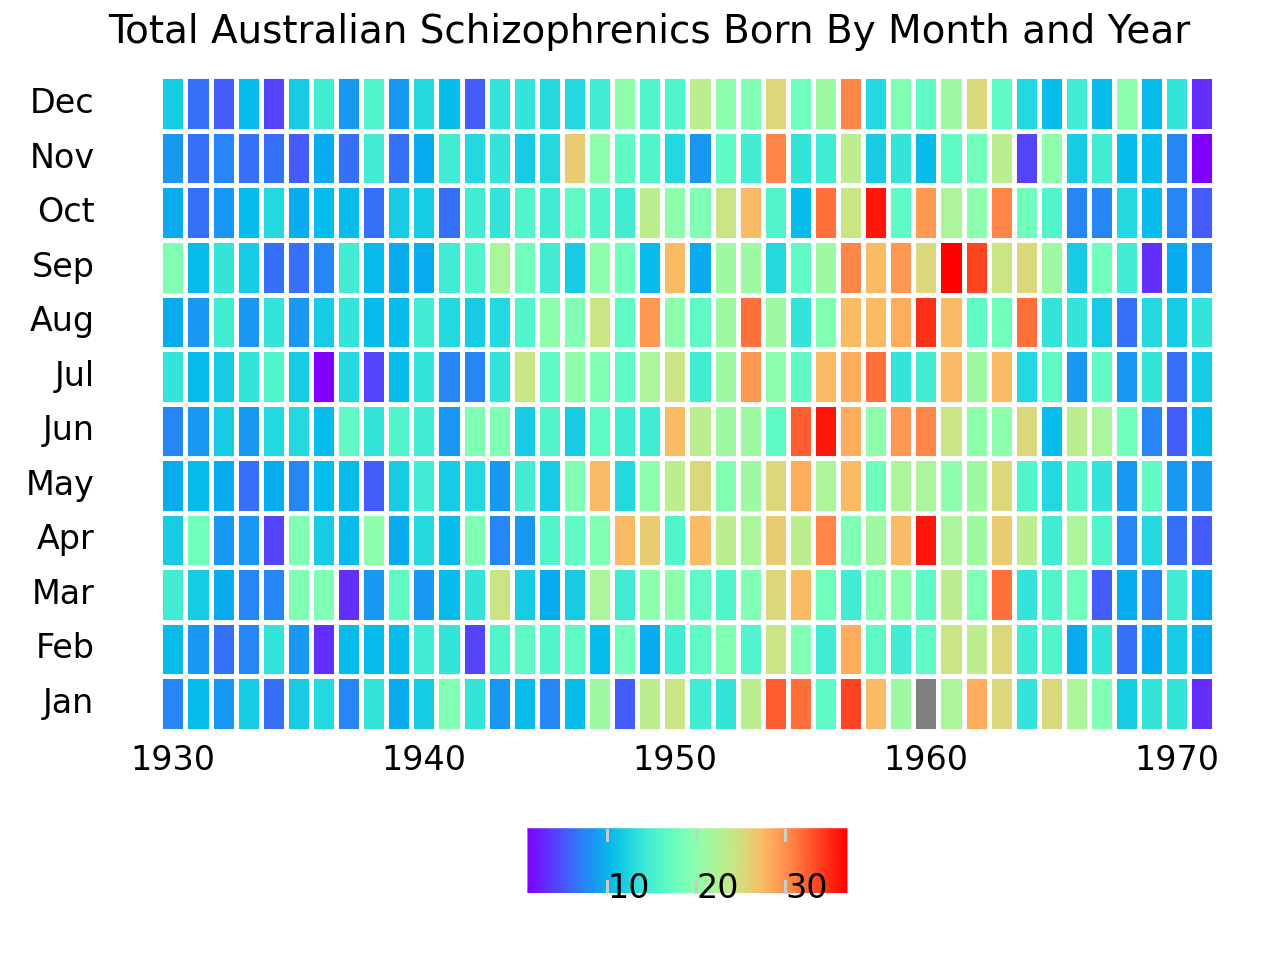

<Figure Size: (640 x 480)>

In [5]:
data_schz = pd.read_csv("../Lecture2/Data/Aus_schz.csv")

label_month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
p = (ggplot(data_schz, aes("year", "month", fill = "SczBroad")) 
  + geom_tile(colour="white", size=1.0, stat="identity") 
  + scale_fill_cmap("rainbow")
  + scale_y_continuous(breaks=range(1, 13), labels=label_month, expand=(0, 0))
  + labs(x = "", y = "", title = "Total Australian Schizophrenics Born By Month and Year") 
  + theme(plot_title = element_text(color="black",hjust=0,vjust=1, size=14),
          panel_background = element_rect(fill="white"),
          panel_border = element_rect(fill=None, color="white", size=0.5, linetype="solid"),
          panel_grid_major = element_blank(),
          panel_grid_minor = element_blank(),
          axis_line = element_blank(),
          axis_ticks = element_blank(), 
          axis_text = element_text(color="black", size=12),
          axis_text_y  = element_text(hjust=1),
          legend_background = element_blank(),
          legend_text = element_text(color="black", size=12),
          legend_position = "bottom",
          legend_title=element_blank()))

p.save("Figs/Aus_rainbow.png", width=BASE_WIDTH*2.0, height=BASE_HEIGHT*1.5, dpi=300)
p

Viridis: besides good feature extraction properties is also perceptually uniform;

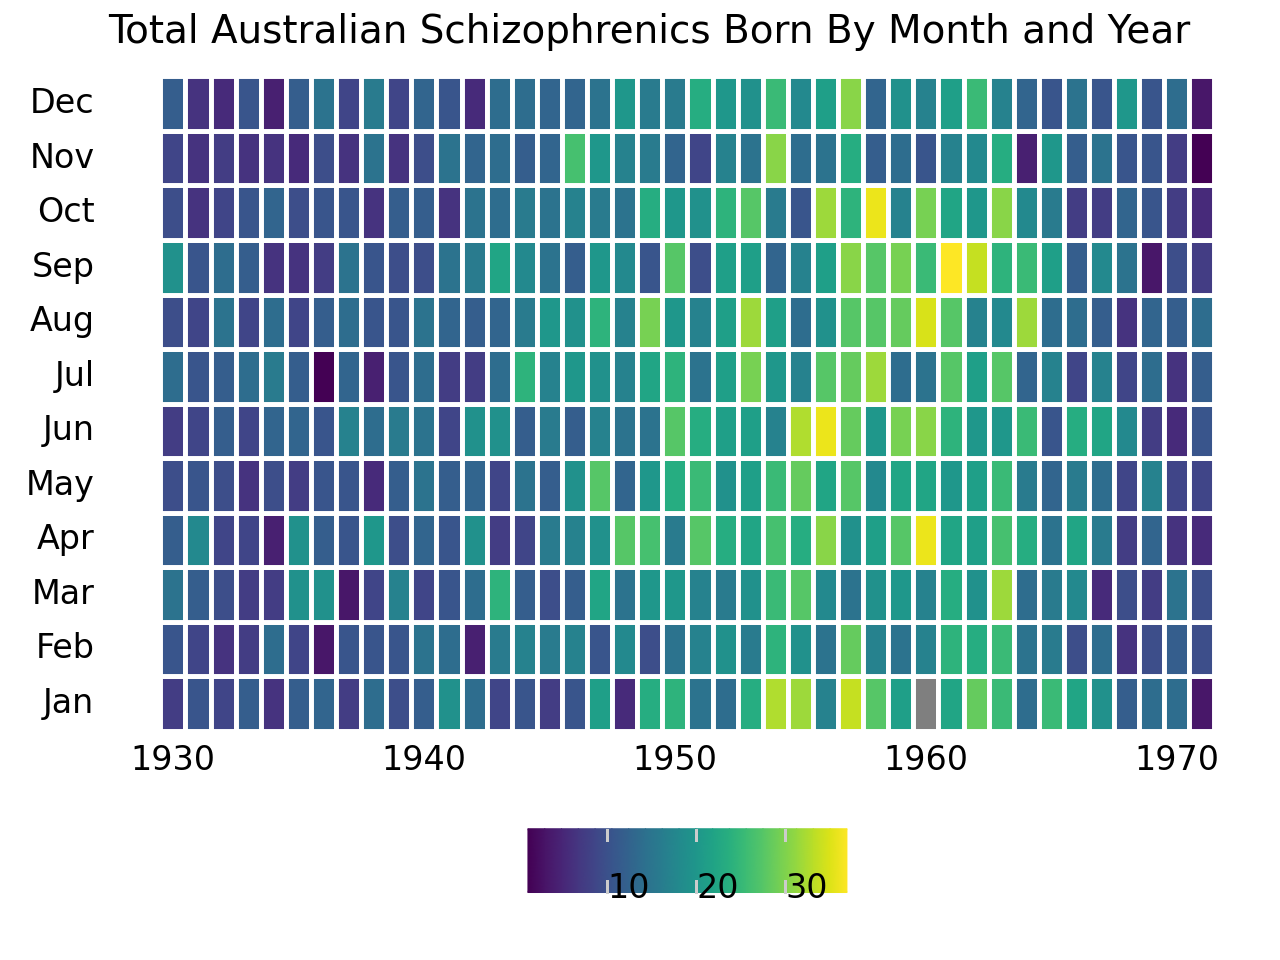

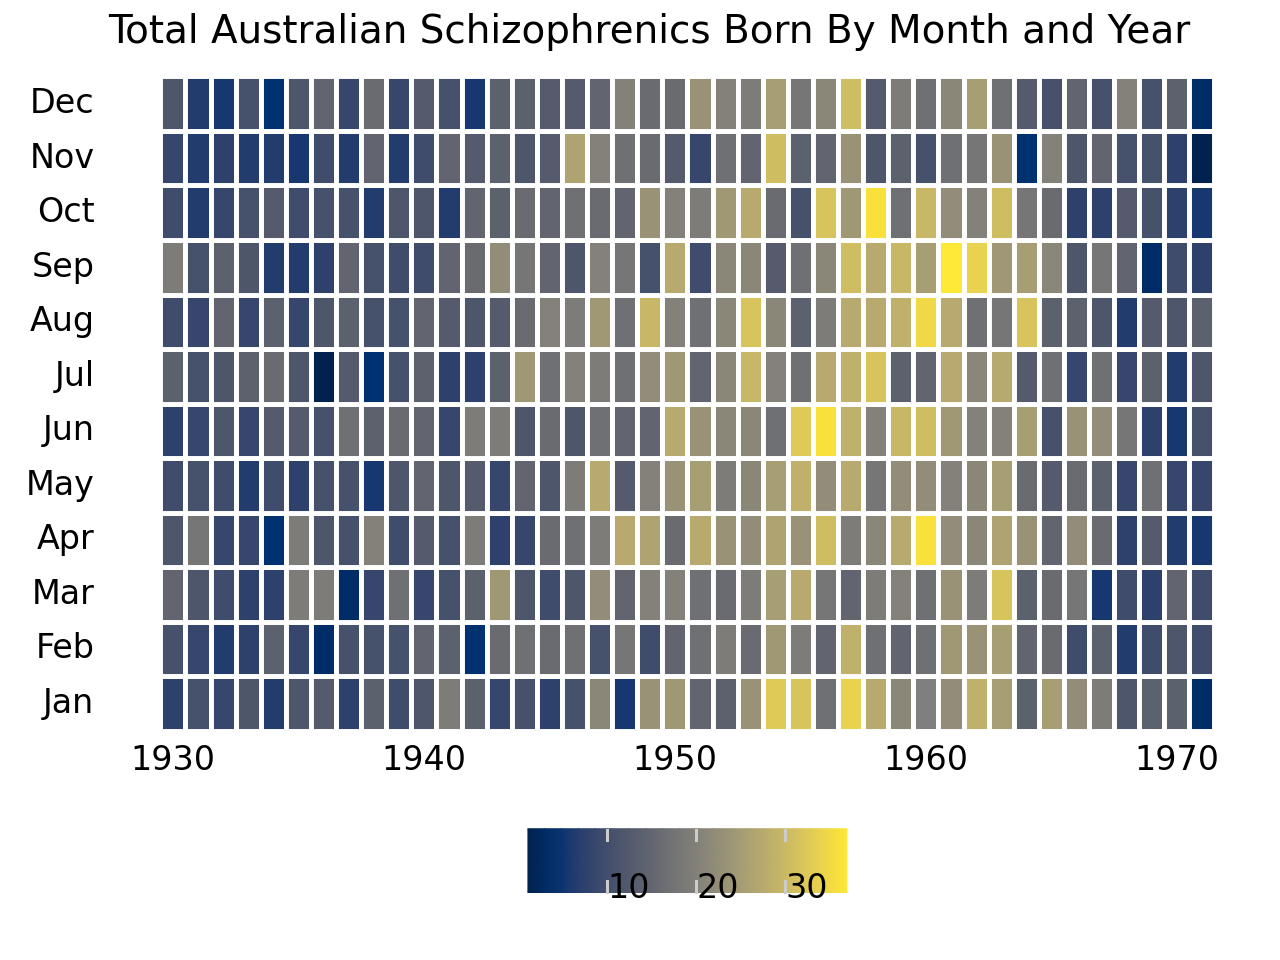

[<Figure Size: (640 x 480)>, <Figure Size: (640 x 480)>]

In [6]:

label_month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
p1 = (ggplot(data_schz, aes("year", "month", fill = "SczBroad")) 
  + geom_tile(colour="white", size=1.0, stat="identity") 
  + scale_fill_cmap("viridis")
  + scale_y_continuous(breaks=range(1, 13), labels=label_month, expand=(0, 0))
  + labs(x = "", y = "", title = "Total Australian Schizophrenics Born By Month and Year") 
  + theme(plot_title = element_text(color="black",hjust=0,vjust=1, size=14),
          panel_background = element_rect(fill="white"),
          panel_border = element_rect(fill=None, color="white", size=0.5, linetype="solid"),
          panel_grid_major = element_blank(),
          panel_grid_minor = element_blank(),
          axis_line = element_blank(),
          axis_ticks = element_blank(), 
          axis_text = element_text(color="black", size=12),
          axis_text_y  = element_text(hjust=1),
          legend_background = element_blank(),
          legend_text = element_text(color="black", size=12),
          legend_position = "bottom",
          legend_title=element_blank()))

p2 = (ggplot(data_schz, aes("year", "month", fill = "SczBroad")) 
  + geom_tile(colour="white", size=1.0, stat="identity") 
  + scale_fill_cmap("cividis")
  + scale_y_continuous(breaks=range(1, 13), labels=label_month, expand=(0, 0))
  + labs(x = "", y = "", title = "Total Australian Schizophrenics Born By Month and Year") 
  + theme(plot_title = element_text(color="black",hjust=0,vjust=1, size=14),
          panel_background = element_rect(fill="white"),
          panel_border = element_rect(fill=None, color="white", size=0.5, linetype="solid"),
          panel_grid_major = element_blank(),
          panel_grid_minor = element_blank(),
          axis_line = element_blank(),
          axis_ticks = element_blank(), 
          axis_text = element_text(color="black", size=12),
          axis_text_y  = element_text(hjust=1),
          legend_background = element_blank(),
          legend_text = element_text(color="black", size=12),
          legend_position = "bottom",
          legend_title=element_blank()))


p1.save("Figs/Aus_viridis.png", width=BASE_WIDTH*2.0, height=BASE_HEIGHT*1.5, dpi=300)
p2.save("Figs/Aus_cividis.png", width=BASE_WIDTH*2.0, height=BASE_HEIGHT*1.5, dpi=300)

[p1, p2]

To further see the need of a good palette, consider the median lifespan data from last lecture. Here, for some colours the ripple disappears when using the rainbow palette.

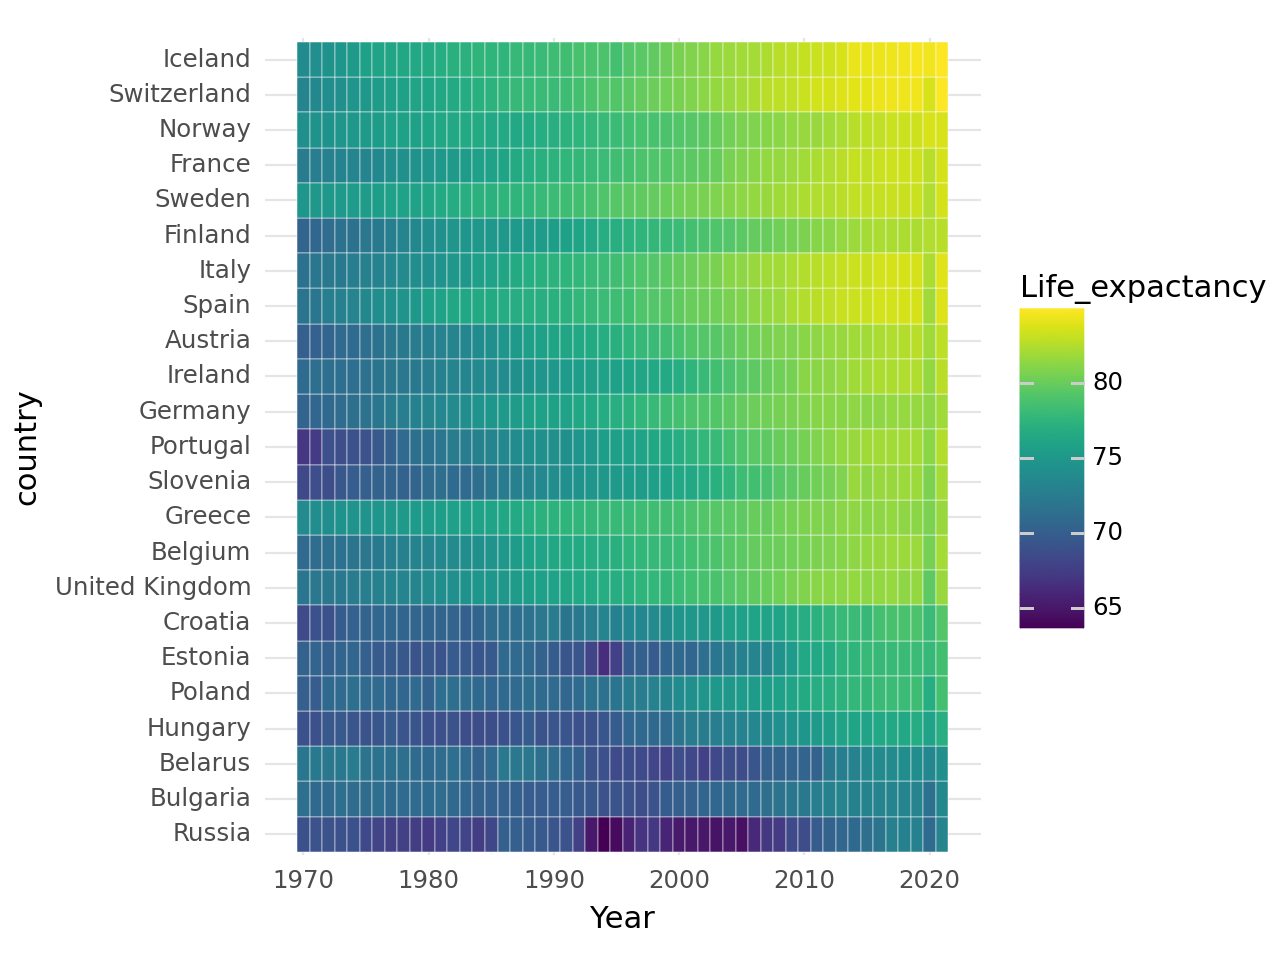

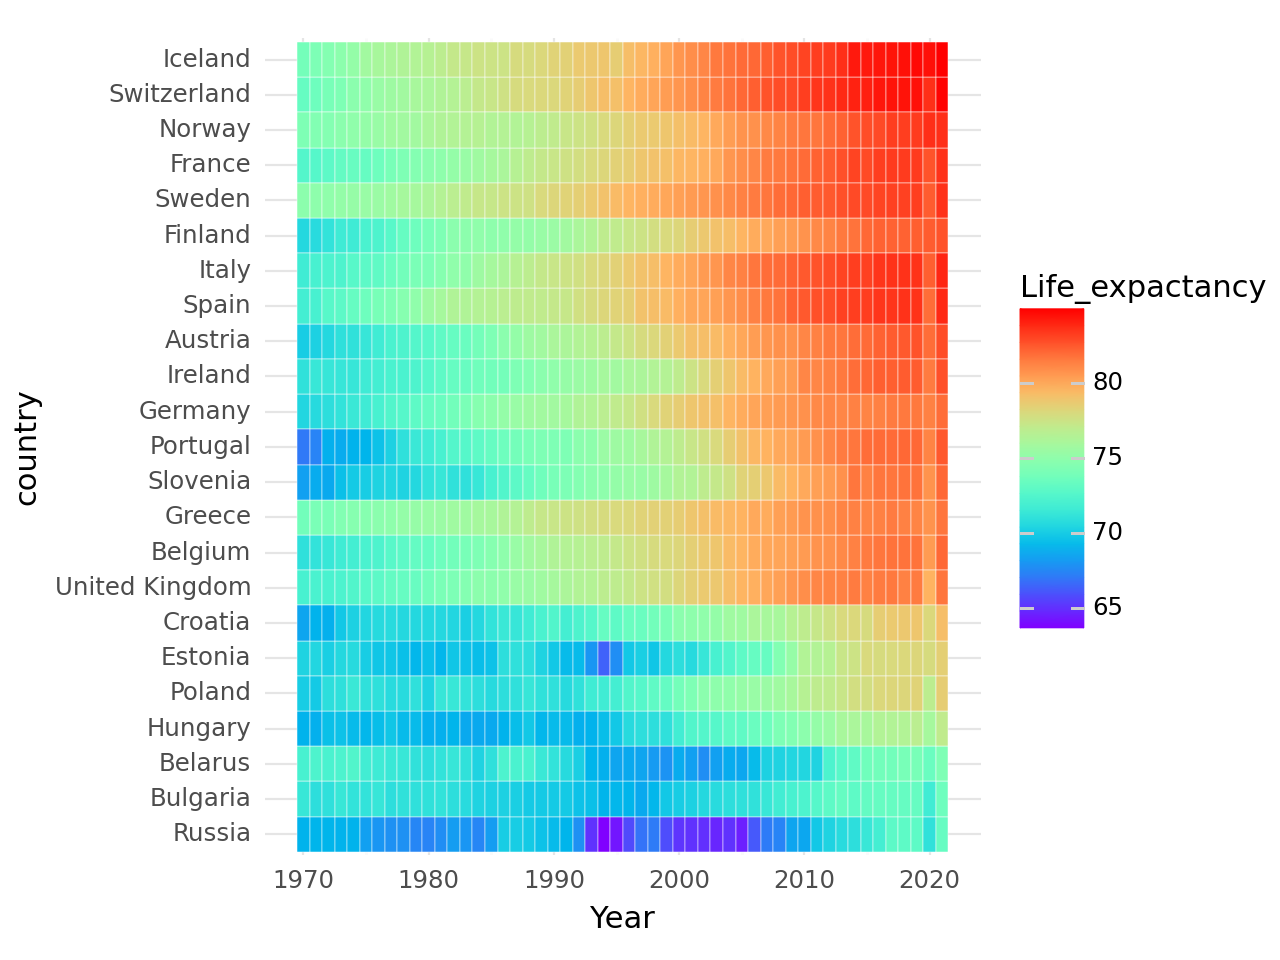

[<Figure Size: (640 x 480)>, <Figure Size: (640 x 480)>]

In [7]:
data_life = pd.read_csv("../Lecture2/Data/Life_tidy.csv")
data2020 = data_life.query("Year == 2020")
pos = data2020["country"].values[np.argsort(data2020["Life_expactancy"])]
data8020 = data_life.query("Year > 1969 and Year < 2022")

p1 = (ggplot(data8020, aes("Year", "country", fill = "Life_expactancy")) 
  + geom_tile(color="white") 
  + scale_y_discrete(limits = pos)  
  + scale_fill_cmap("viridis")
  + theme_minimal())

p2 = (ggplot(data8020, aes("Year", "country", fill = "Life_expactancy")) 
  + geom_tile(color="white") 
  + scale_y_discrete(limits = pos)  
  + scale_fill_cmap("rainbow")
  + theme_minimal())

[p1, p2]

When visualising continuous amounts, a categorical colour scale is often a good choice. However, sometimes we have a natural reference point (e.g the median) in the data which we want to compare against. Here, a diverging colour scale is useful.

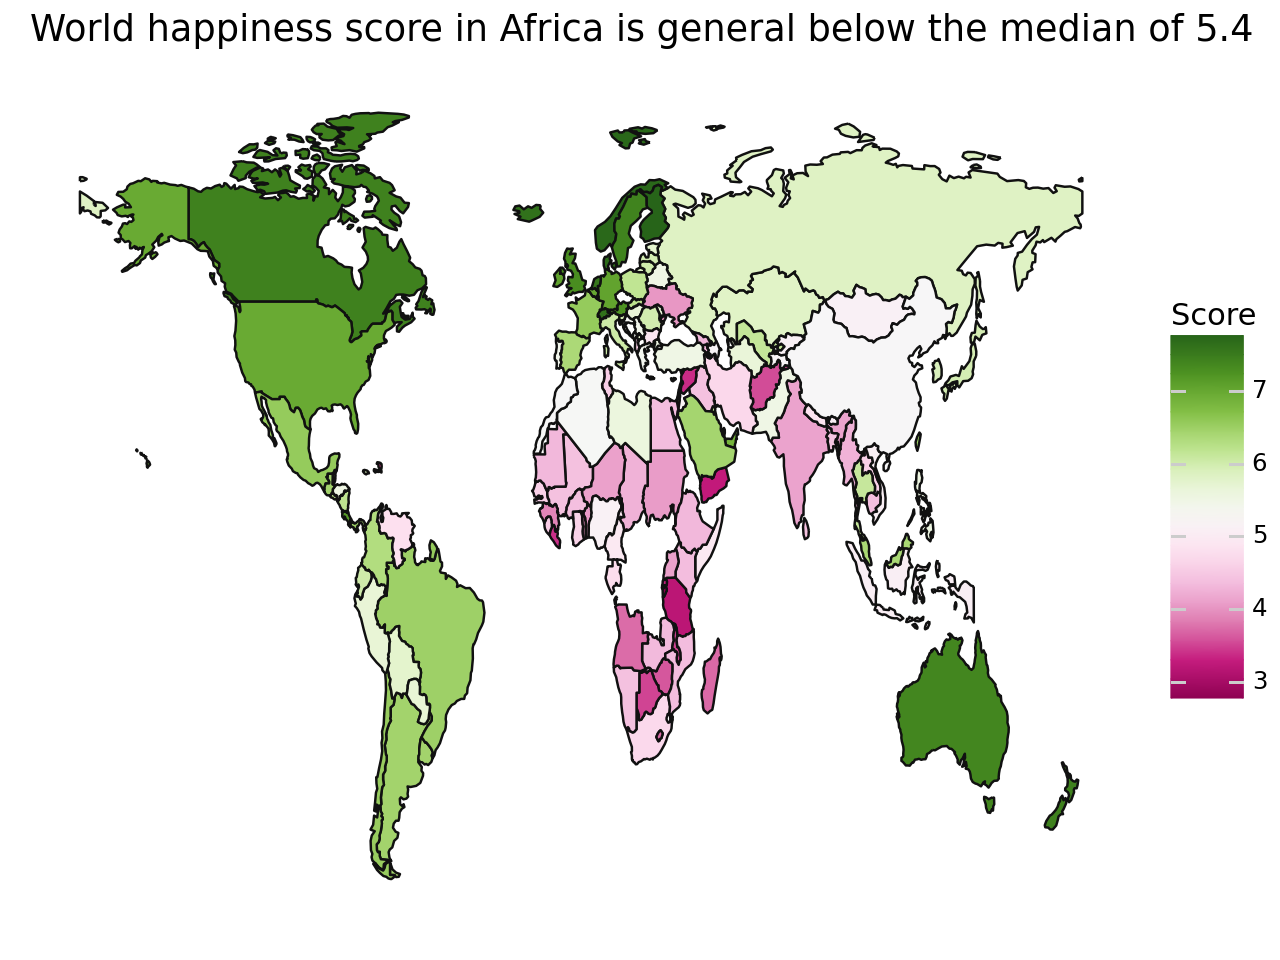

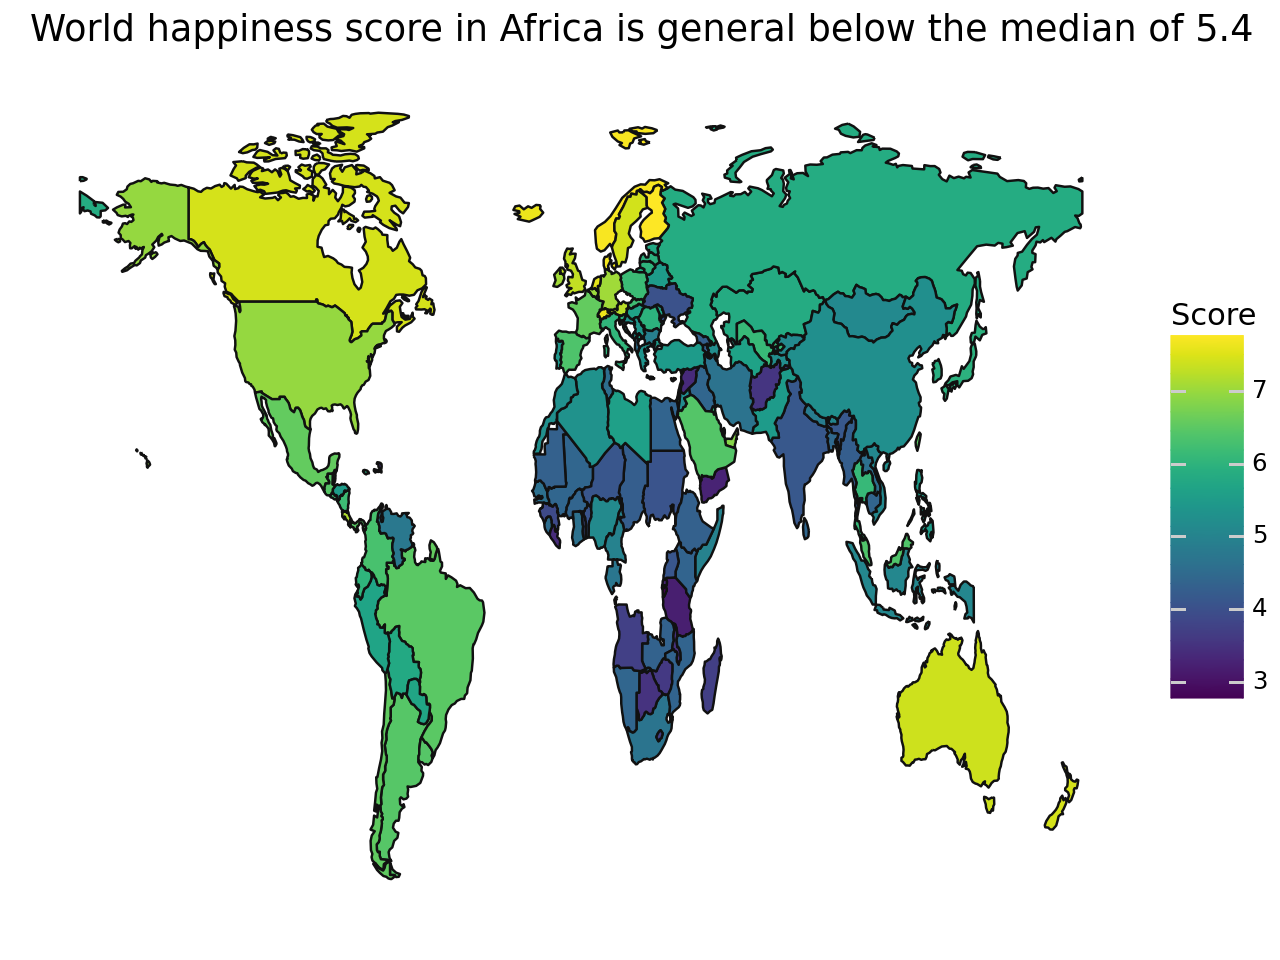

[<Figure Size: (640 x 480)>, <Figure Size: (640 x 480)>]

In [8]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world_happiness = pd.read_csv("Data/2018.csv")
new_row = pd.DataFrame({"Overall rank" : 1000, "Country or region": "United States of America", "Score" : 6.89, "GDP per capita": 1e9}, index=[0]) # Somehow USA in not in the data
world_happiness = pd.concat([world_happiness, new_row])
world_total_data = world.merge(world_happiness, left_on="name", right_on="Country or region")

p1 = (ggplot(world_total_data, aes(fill="Score"))
    + geom_map()
    + labs(title="World happiness score in Africa is general below the median of 5.4")
    + scale_fill_cmap("PiYG")
    + theme_void())

p2 = (ggplot(world_total_data, aes(fill="Score"))
    + geom_map()
    + labs(title="World happiness score in Africa is general below the median of 5.4")
    + scale_fill_cmap("viridis")
    + theme_void())


p1.save("Figs/Map_divergent.png", width=BASE_WIDTH*2.0, height=BASE_HEIGHT*1.5, dpi=300)
p2.save("Figs/Map_viridis.png", width=BASE_WIDTH*2.0, height=BASE_HEIGHT*1.5, dpi=300)

# Write data to disk to we in next lecture can try to figure out the thing with Finland :)



[p1, p2]


In [9]:
world_total_data.to_csv("Data/Total_world_data.csv")

Sometimes we have datasets with different categories. Often it is desired to investigate and compare different categories against each other, and often this is crucial when exploring data. Consider:

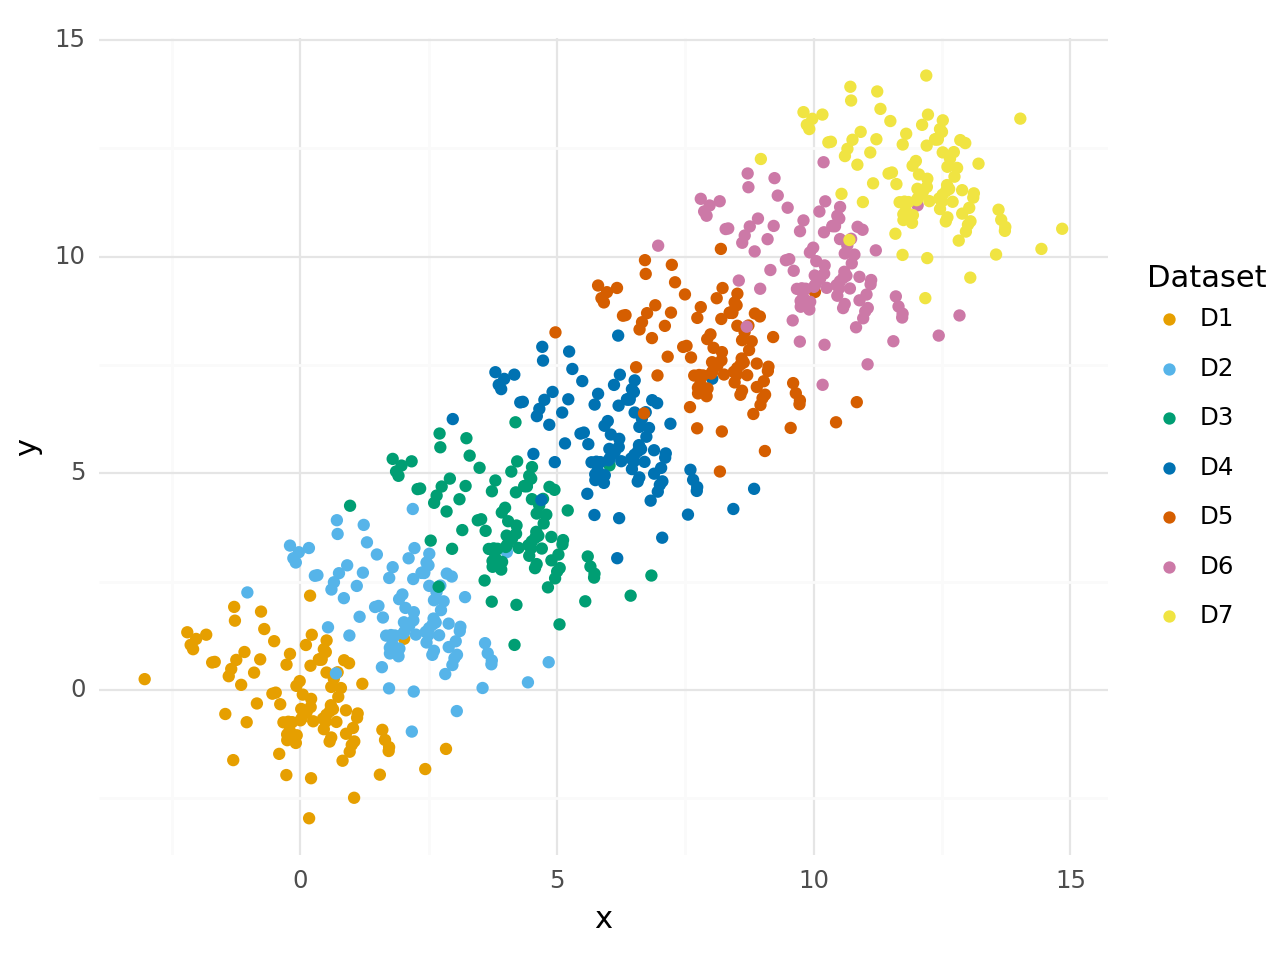

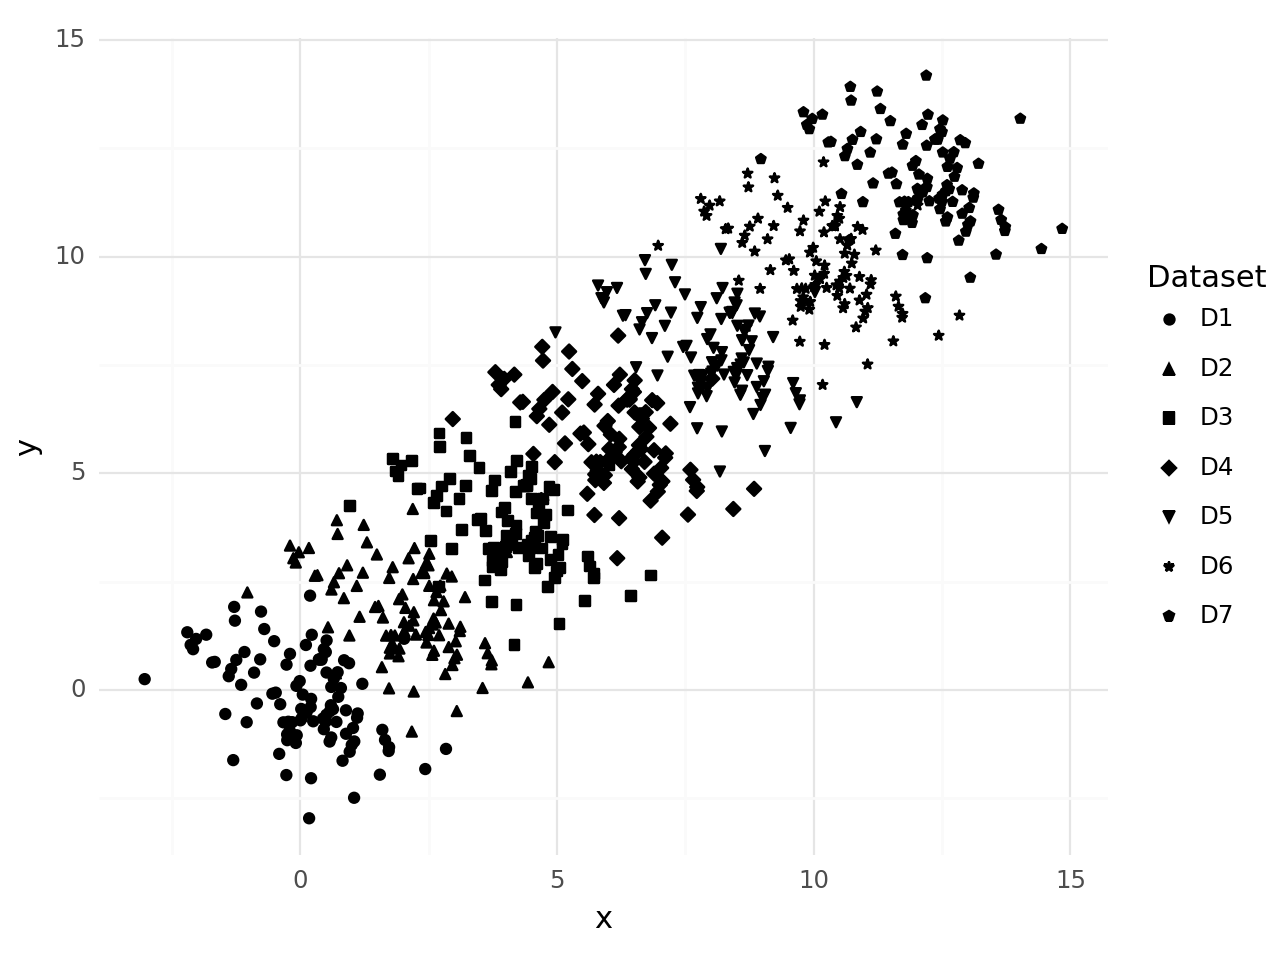

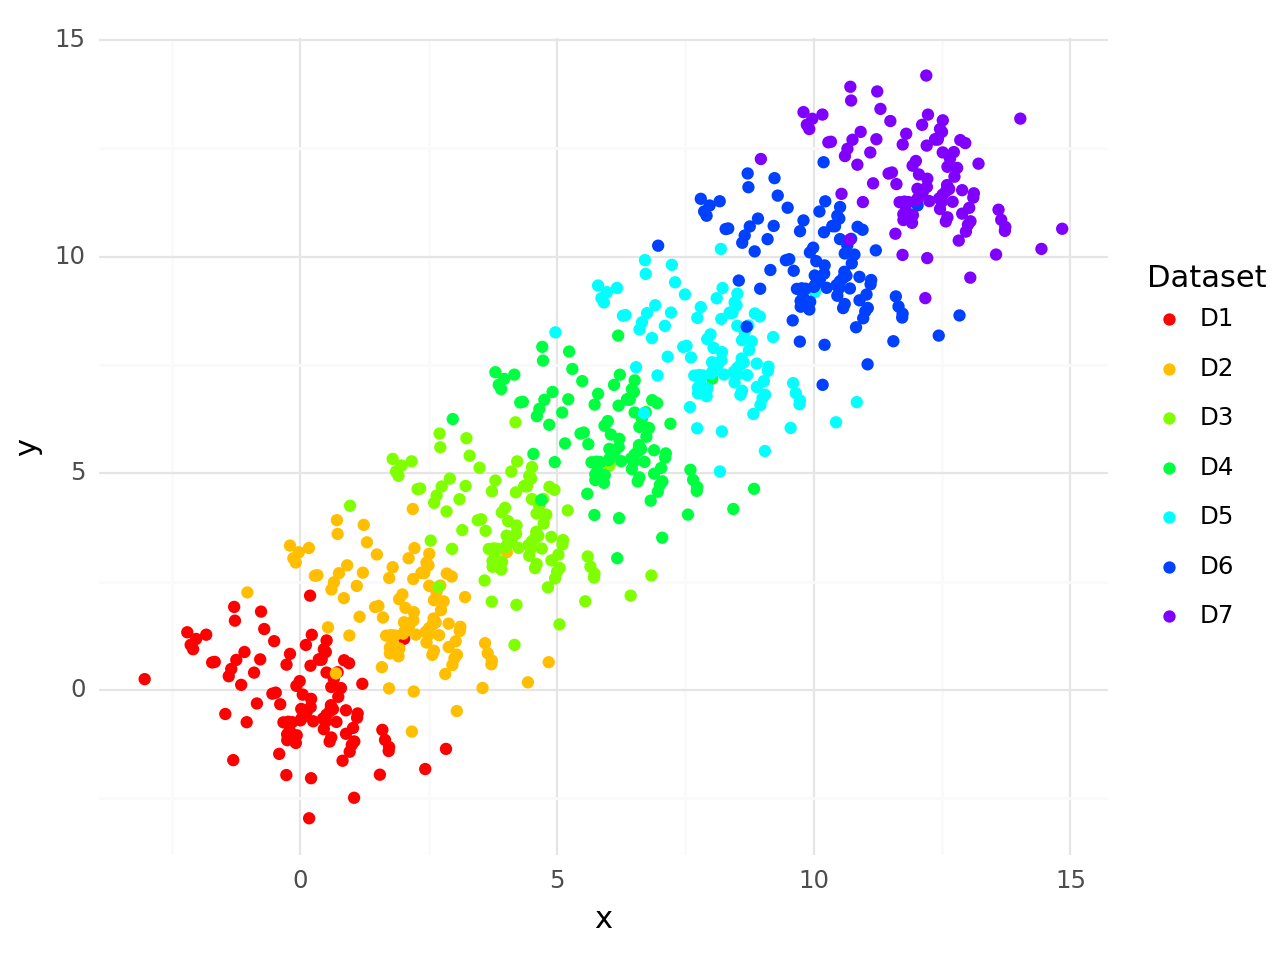

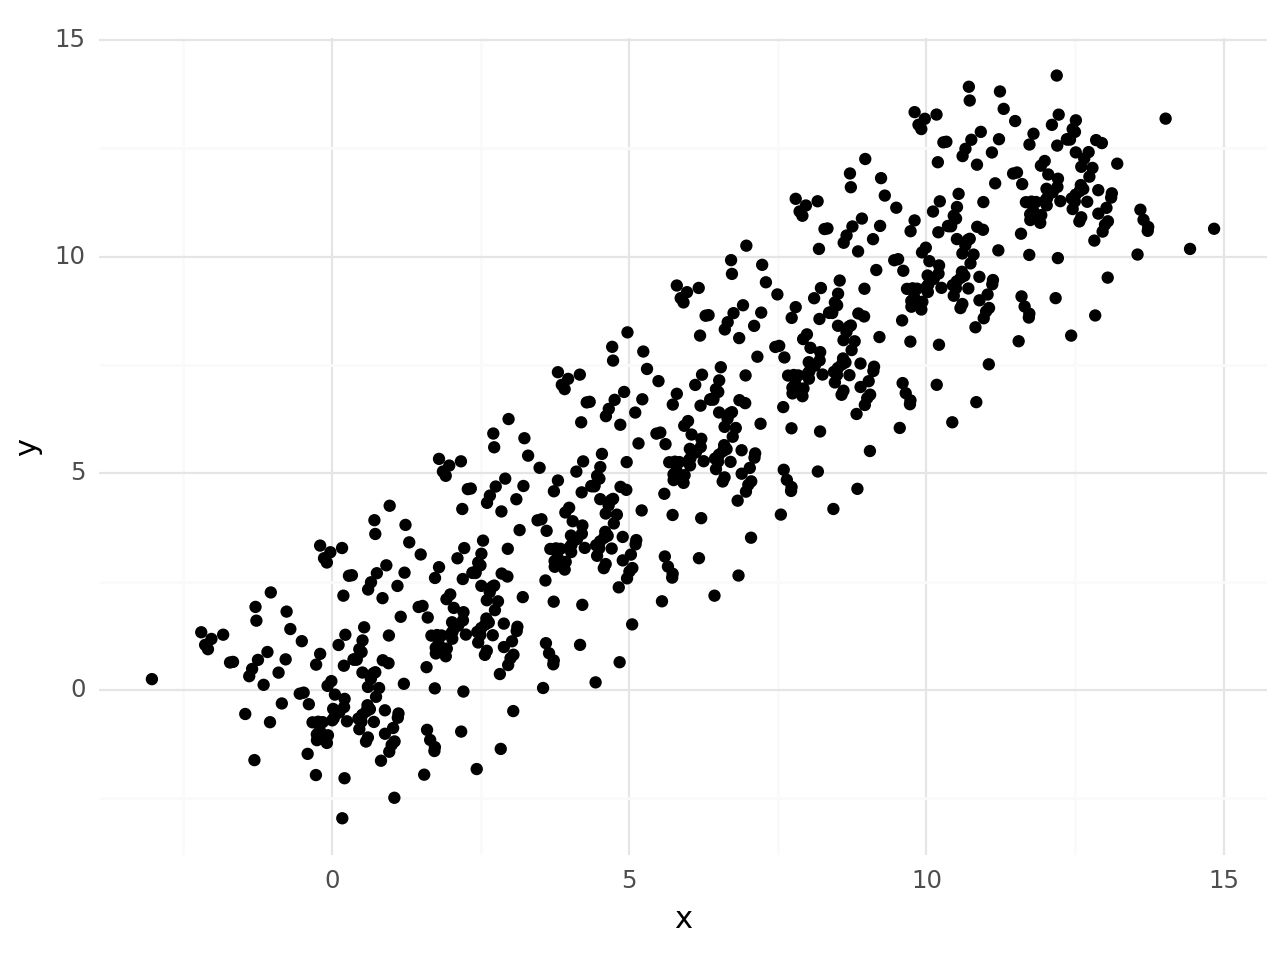

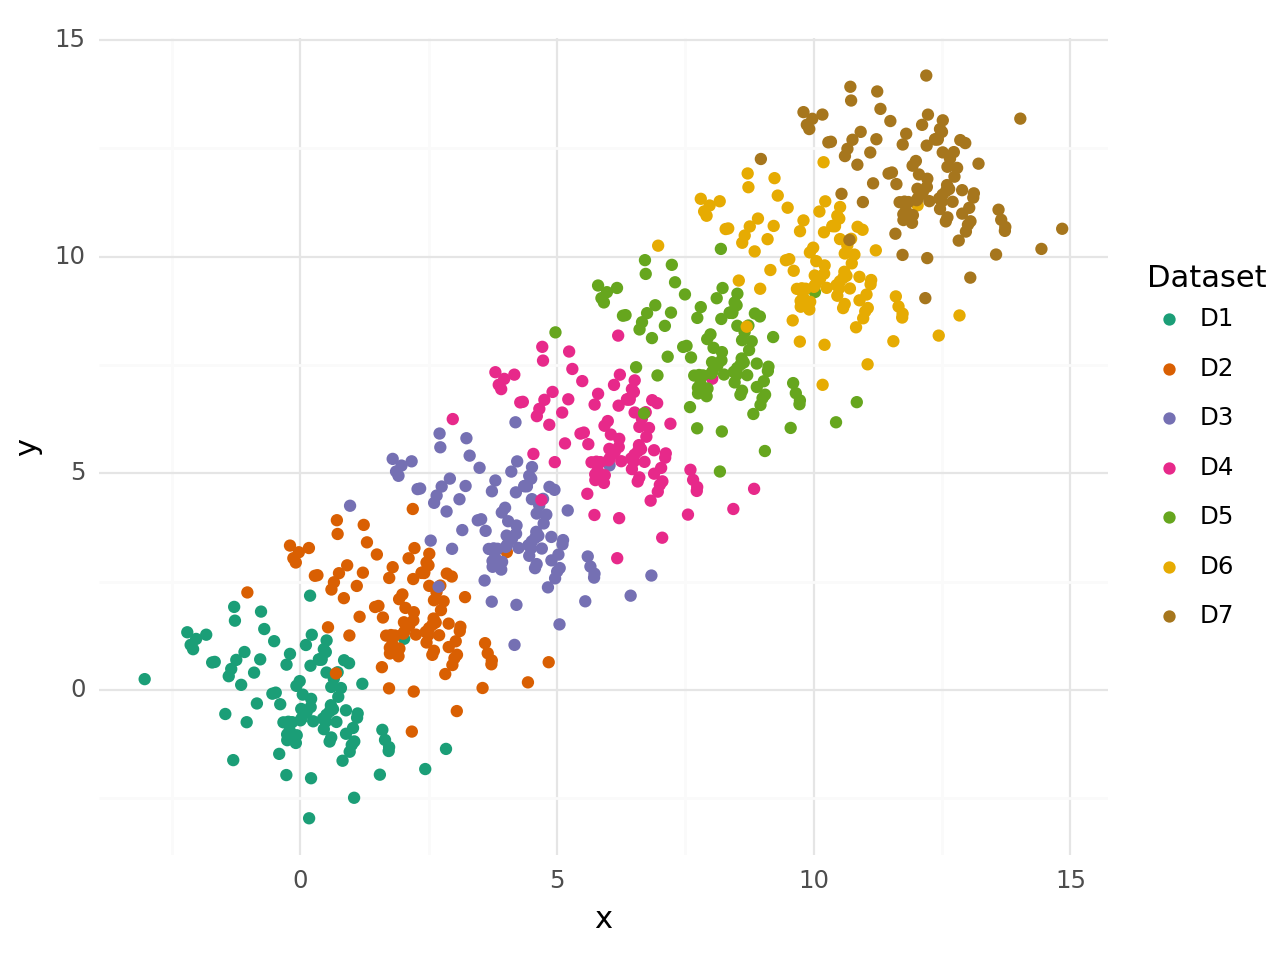

[<Figure Size: (640 x 480)>,
 <Figure Size: (640 x 480)>,
 <Figure Size: (640 x 480)>,
 <Figure Size: (640 x 480)>,
 <Figure Size: (640 x 480)>]

In [10]:
data_plot = pd.read_csv("Data/Ex_colors.csv")

col_rainbow = ["#FF0000", "#FFBF00", "#80FF00", "#00FF40", "#00FFFF", "#0040FF", "#8000FF", "#FF00BF"]
data_plot = data_plot.assign(data_plot = pd.Categorical(data_plot["dataset"], 
                                                        categories=["D1", "D2", "D3", "D4", "D5", "D6", "D7"]))

p1 = (ggplot(data_plot, aes("x", "y", color="dataset"))
    + geom_point()
    + scale_color_manual(values = cbPalette, name="Dataset")
    + theme_minimal())

p2 = (ggplot(data_plot, aes("x", "y", shape="dataset"))
    + geom_point()
    + scale_shape_discrete(name = "Dataset")
    + theme_minimal())

p3 = (ggplot(data_plot, aes("x", "y", color="dataset"))
    + geom_point()
    + scale_color_manual(values = col_rainbow, name="Dataset")
    + theme_minimal())

p4 = (ggplot(data_plot, aes("x", "y"))
    + geom_point()
    + theme_minimal())

dark2 = ["#1b9e77", "#d95f02", "#7570b3", "#e7298a", "#66a61e", "#e6ab02", "#a6761d"]
p5 = (ggplot(data_plot, aes("x", "y", color="dataset"))
    + geom_point()
    + scale_color_manual(values=dark2, name="Dataset")
    + theme_minimal())

p1.save("Figs/Categorical_color_good.png", dpi=300, width=BASE_WIDTH, height=BASE_HEIGHT)
p2.save("Figs/Categorical_symbol.png", dpi=300, width=BASE_WIDTH, height=BASE_HEIGHT)
p3.save("Figs/Categorical_color_bad.png", dpi=300, width=BASE_WIDTH, height=BASE_HEIGHT)
p5.save("Figs/Dark2_bad.png", dpi=300, width=BASE_WIDTH, height=BASE_HEIGHT)

[p1, p2, p3, p4, p5]

It is further important to handle colourblindness. The palette I have provided you with is designed for that purpose (see lecture). When doing colourmaps, I can recommend Cividis, which has the same properties as Viridis but is further covers a larger group of colour vision deficiencies: 

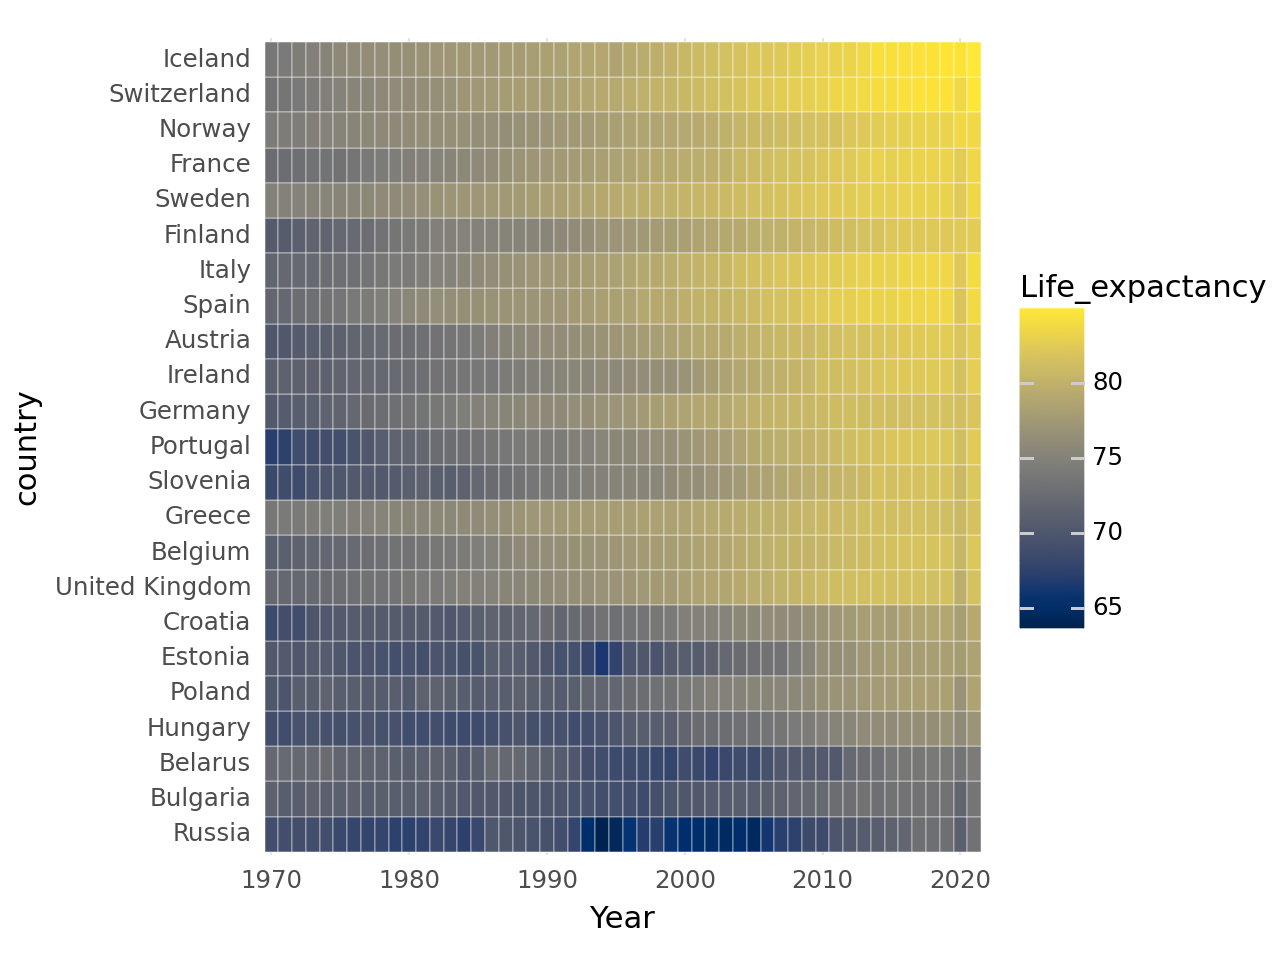

<Figure Size: (640 x 480)>

In [11]:
p = (ggplot(data8020, aes("Year", "country", fill = "Life_expactancy")) 
  + geom_tile(color="white") 
  + scale_y_discrete(limits = pos)  
  + scale_fill_cmap("cividis")
  + scale_x_continuous(expand=(0, 0))
  + theme_minimal())

p

Sometimes when plotting categorical data we might want to highlight a certain aspect. Here, we need background colours, and foreground colours. Below is a nice palette with good colourblindness properties.

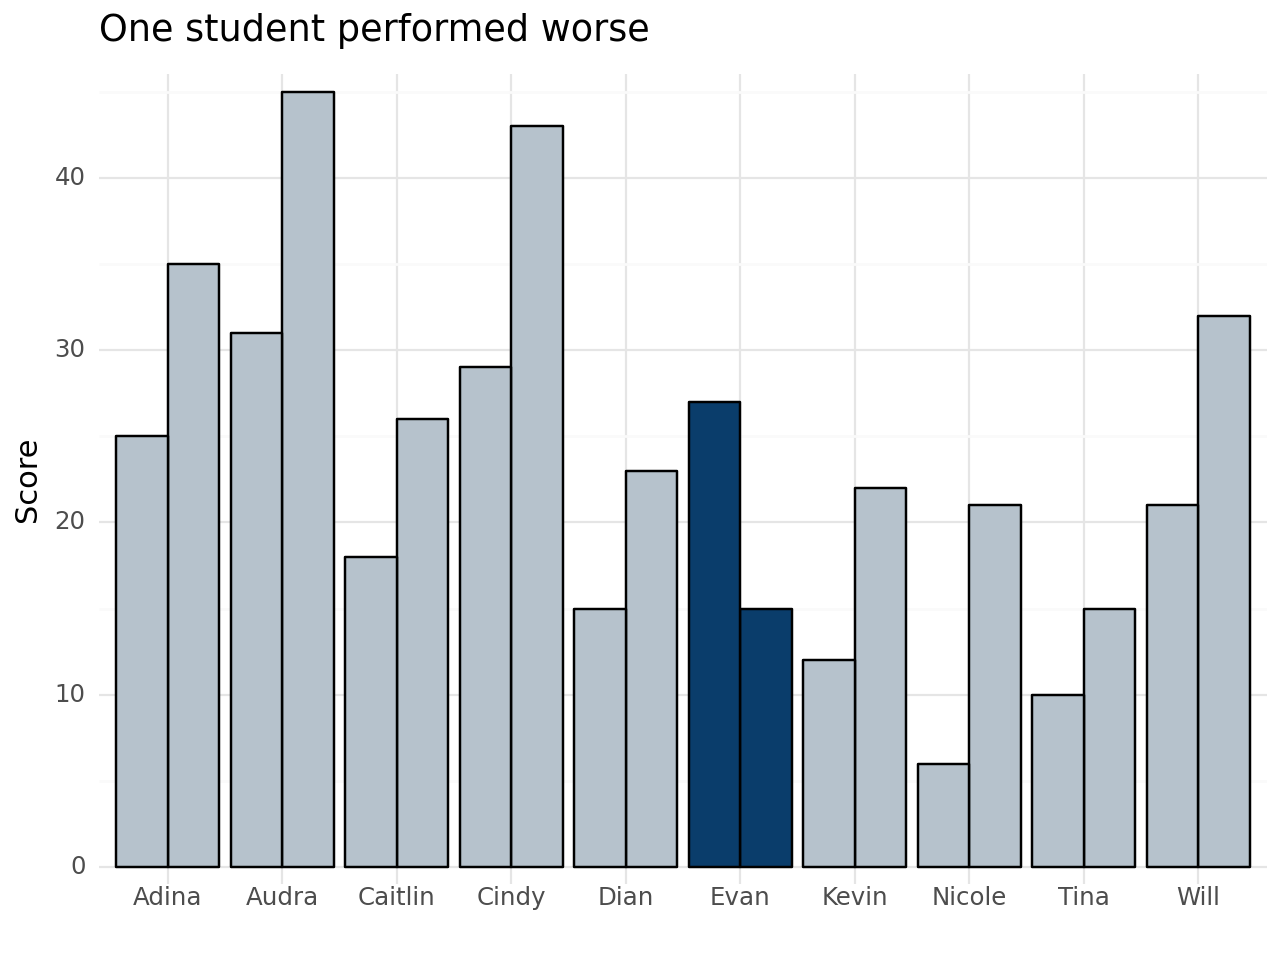

<Figure Size: (640 x 480)>

In [12]:
data1 = pd.DataFrame({"Name" : ["Audra", "Audra", "Adina", "Adina", "Caitlin", "Caitlin", "Cindy", "Cindy", "Dian", "Dian", "Kevin", "Kevin", "Nicole", "Nicole", "Evan", "Evan", "Tina", "Tina", "Will", "Will"],
                      "Score" : [31, 45, 25, 35, 18, 26, 29, 43, 15, 23, 12, 22, 6, 21, 27, 15, 10, 15, 21, 32],
                      "Test" : ["1", "2", "1", "2", "1", "2", "1", "2", "1", "2", "1", "2", "1", "2", "1", "2", "1", "2", "1", "2"], 
                      "Worse" : ["0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "1", "1", "0", "0", "0", "0"]})

col_highlight = ["#D0C0B0", "#B6C2CC", "#BEAAB4", "#ECE9CD", "#0A3D6B", "#0D5C3D", "#812F02"]
col_use = ["#B6C2CC", "#0A3D6B"]

p2 = (ggplot(data1, aes("Name", "Score", group="Test", fill="Worse"))
    + geom_bar(stat="identity", position="dodge", color="black")
    + scale_fill_manual(values=col_use)
    + labs(x = "", title = "One student performed worse")
    + theme_minimal()
    + scale_y_continuous(expand=(0, 1))
    + theme(legend_position="none", 
            axis_text_x = element_text(vjust=-0.4)))

p2.save("Figs/Got_worse.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300)

p2

Overall, we can say a lot about colours. Still, in the end it all depends on the message. 

## Proportions

Let us start with pie chart. Since *plotnine* does not support pie charts (specifically, polar coordinates), we will use *matplotlib*. Below, we have a classical example of where it does not make sense to other colours than the classical party colours. 

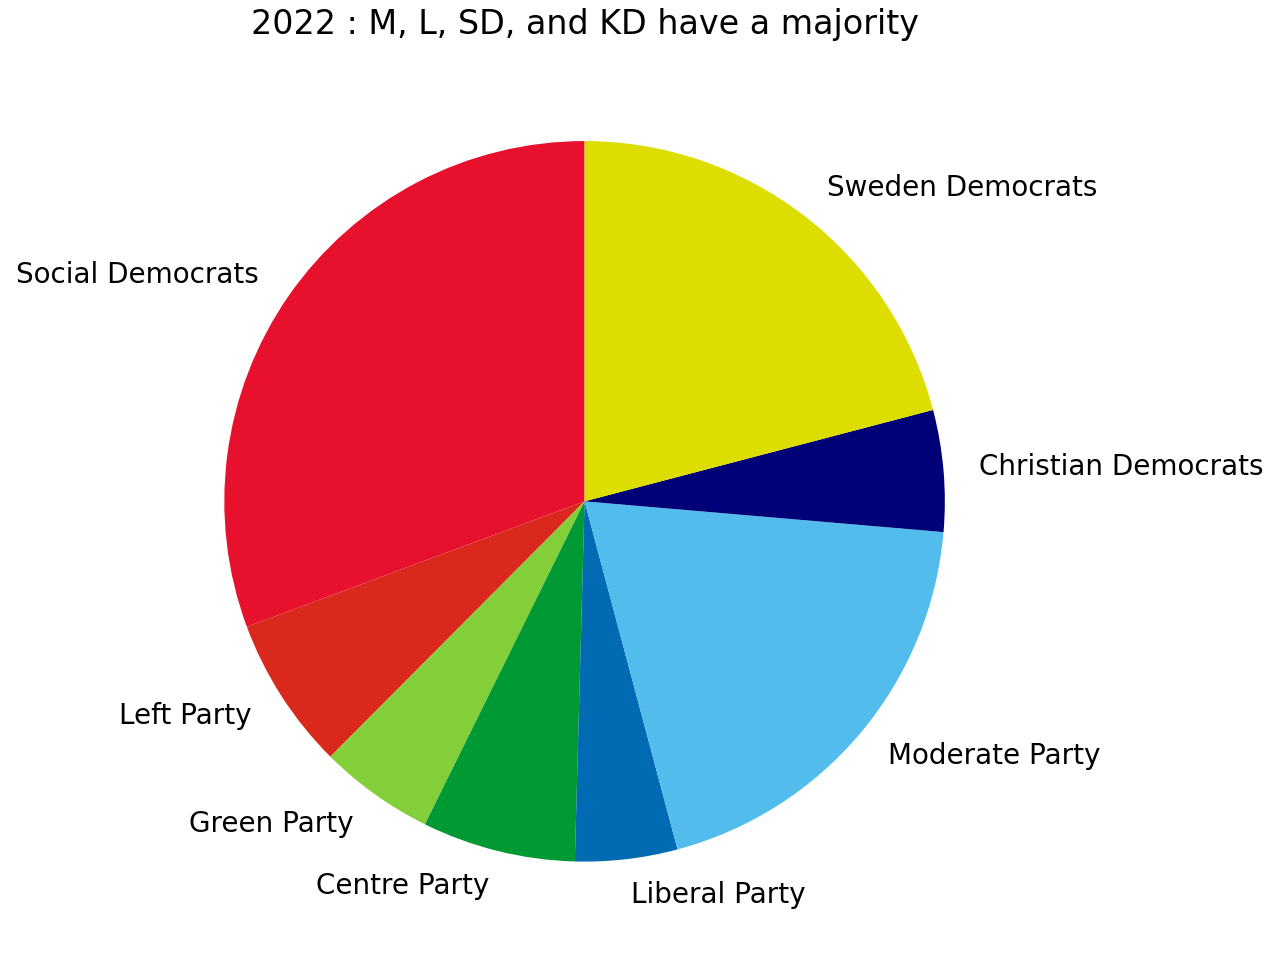

In [13]:
swedish_election_2022 = pd.DataFrame({"Party" : ["Social Democrats", "Left Party", "Green Party", "Centre Party", "Liberal Party", "Moderate Party", "Christian Democrats", "Sweden Democrats"],
                                      "Number_of_seats" : [107, 24, 18, 24, 16, 68, 19, 73],
                                      "Year" : [2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022], 
                                      "Color" : ["#E8112d", "#DA291C", "#83CF39", "#009933", "#006AB3", "#52BDEC", "#000077", "#DDDD00"]})
swedish_election_2022["Frac_seats"] = swedish_election_2022["Number_of_seats"] / np.sum(swedish_election_2022["Number_of_seats"]) * 100
swedish_election_2022                             

fig, axs = plt.subplots(1, 1, constrained_layout=True)
axs.pie(swedish_election_2022["Frac_seats"], 
        labels=swedish_election_2022["Party"],  
        colors = swedish_election_2022["Color"], 
        startangle=90.0)
axs.set_title("2022 : M, L, SD, and KD have a majority")
plt.show()
fig.savefig(dir_save + "Single_pie.png")


In [14]:
swedish_election_2018 = pd.DataFrame({"Party" : ["Social Democrats", "Left Party", "Green Party", "Centre Party", "Liberal Party", "Moderate Party", "Christian Democrats", "Sweden Democrats"],
                                      "Number_of_seats" : [100, 28, 16, 31, 20, 70, 22, 62],
                                      "Year" : [2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018], 
                                      "Color" : ["#E8112d", "#DA291C", "#83CF39", "#009933", "#006AB3", "#52BDEC", "#000077", "#DDDD00"]})
swedish_election_2014 = pd.DataFrame({"Party" : ["Social Democrats", "Left Party", "Green Party", "Centre Party", "Liberal Party", "Moderate Party", "Christian Democrats", "Sweden Democrats"],
                                      "Number_of_seats" : [113, 21, 25, 22, 19, 84, 16, 49],
                                      "Year" : [2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014], 
                                      "Color" : ["#E8112d", "#DA291C", "#83CF39", "#009933", "#006AB3", "#52BDEC", "#000077", "#DDDD00"]})
swedish_election_2018["Frac_seats"] = swedish_election_2018["Number_of_seats"] / np.sum(swedish_election_2018["Number_of_seats"]) * 100
swedish_election_2014["Frac_seats"] = swedish_election_2014["Number_of_seats"] / np.sum(swedish_election_2014["Number_of_seats"]) * 100


fig, axs = plt.subplots(1, 3, constrained_layout=True, dpi=300, figsize=(18, 10))

axs[2].pie(swedish_election_2022["Frac_seats"], 
        labels=swedish_election_2022["Party"], 
        colors = swedish_election_2022["Color"], 
        autopct='%1.1f%%',
        startangle=90.0)
axs[2].set_title("2022 Swedish election")

axs[1].pie(swedish_election_2018["Frac_seats"], 
        labels=swedish_election_2018["Party"], 
        colors = swedish_election_2018["Color"], 
        autopct='%1.1f%%',
        startangle=90.0)
axs[1].set_title("2018 Swedish election")

axs[0].pie(swedish_election_2014["Frac_seats"], 
        labels=swedish_election_2014["Party"], 
        colors = swedish_election_2014["Color"], 
        autopct='%1.1f%%',
        startangle=90.0)
axs[0].set_title("2014 Swedish election")
plt.show()
fig.savefig(dir_save + "Many_pie.svg")



Note: pie charts do not work well when we want to make comparisons between different charts. Here, a classical bar chart can be better, and a line chart can be even better.

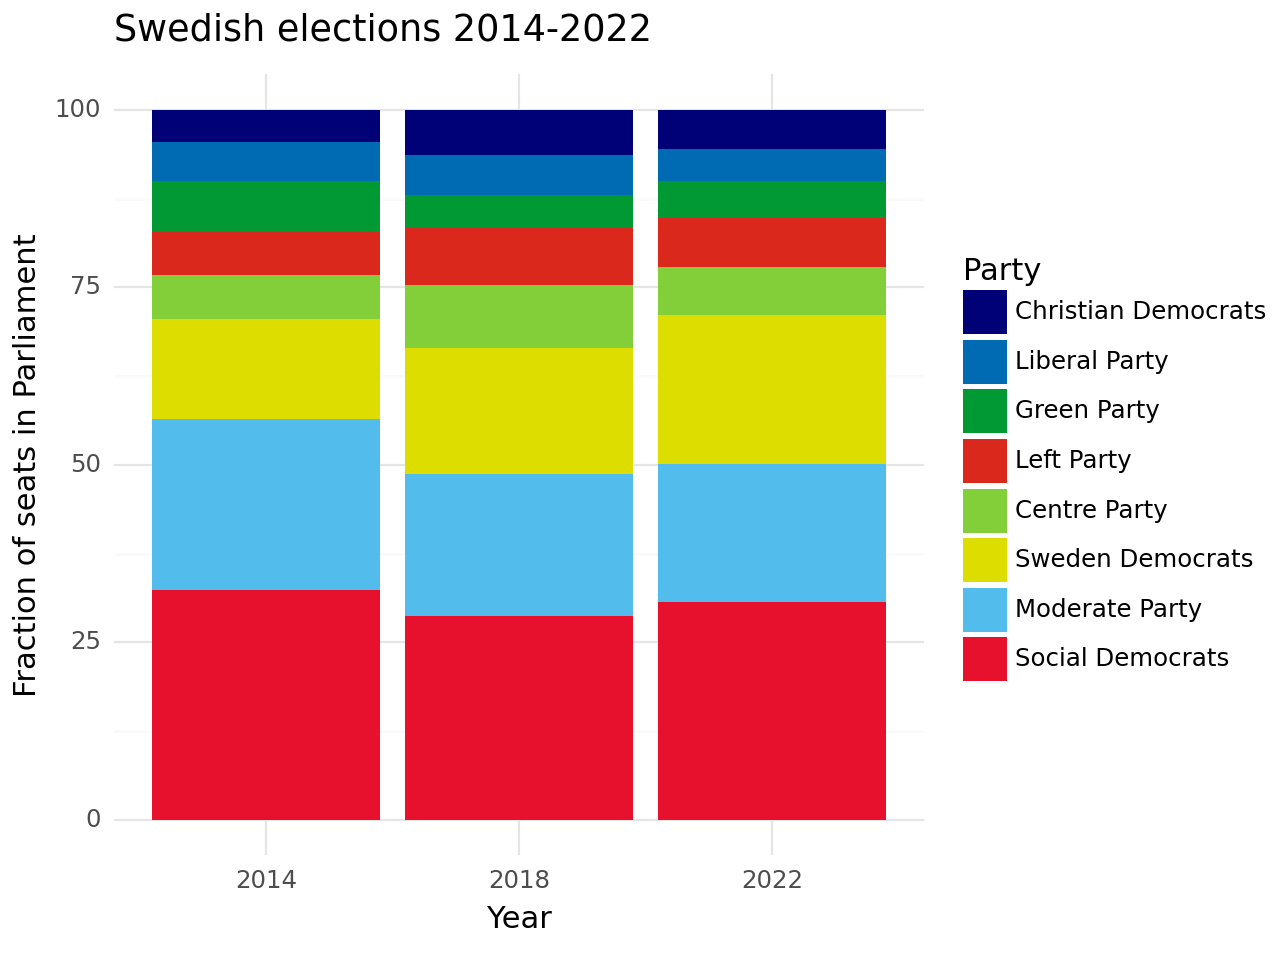

<Figure Size: (640 x 480)>

In [15]:
data_election = pd.concat([swedish_election_2014, swedish_election_2018, swedish_election_2022])
data_election = data_election.assign(Party = pd.Categorical(data_election["Party"], 
                                                           categories=["Social Democrats", "Moderate Party", "Sweden Democrats", "Centre Party", "Left Party", "Green Party", "Liberal Party", "Christian Democrats"][::-1]))
data_election = data_election.assign(Year = pd.Categorical(data_election["Year"], 
                                                           categories=[2014, 2018, 2022]))

color_use = ["#E8112d", "#52BDEC", "#DDDD00", "#83CF39", "#DA291C", "#009933", "#006AB3", "#000077"][::-1]

p = (ggplot(data_election, aes("Year", "Frac_seats", fill = "Party"))
    + geom_bar(stat = "identity")
    + scale_fill_manual(values = color_use)
    + labs(y = "Fraction of seats in Parliament", x= "Year", title = "Swedish elections 2014-2022")
    + theme_minimal())

p.save("Figs/Election_year_stack.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300)
p


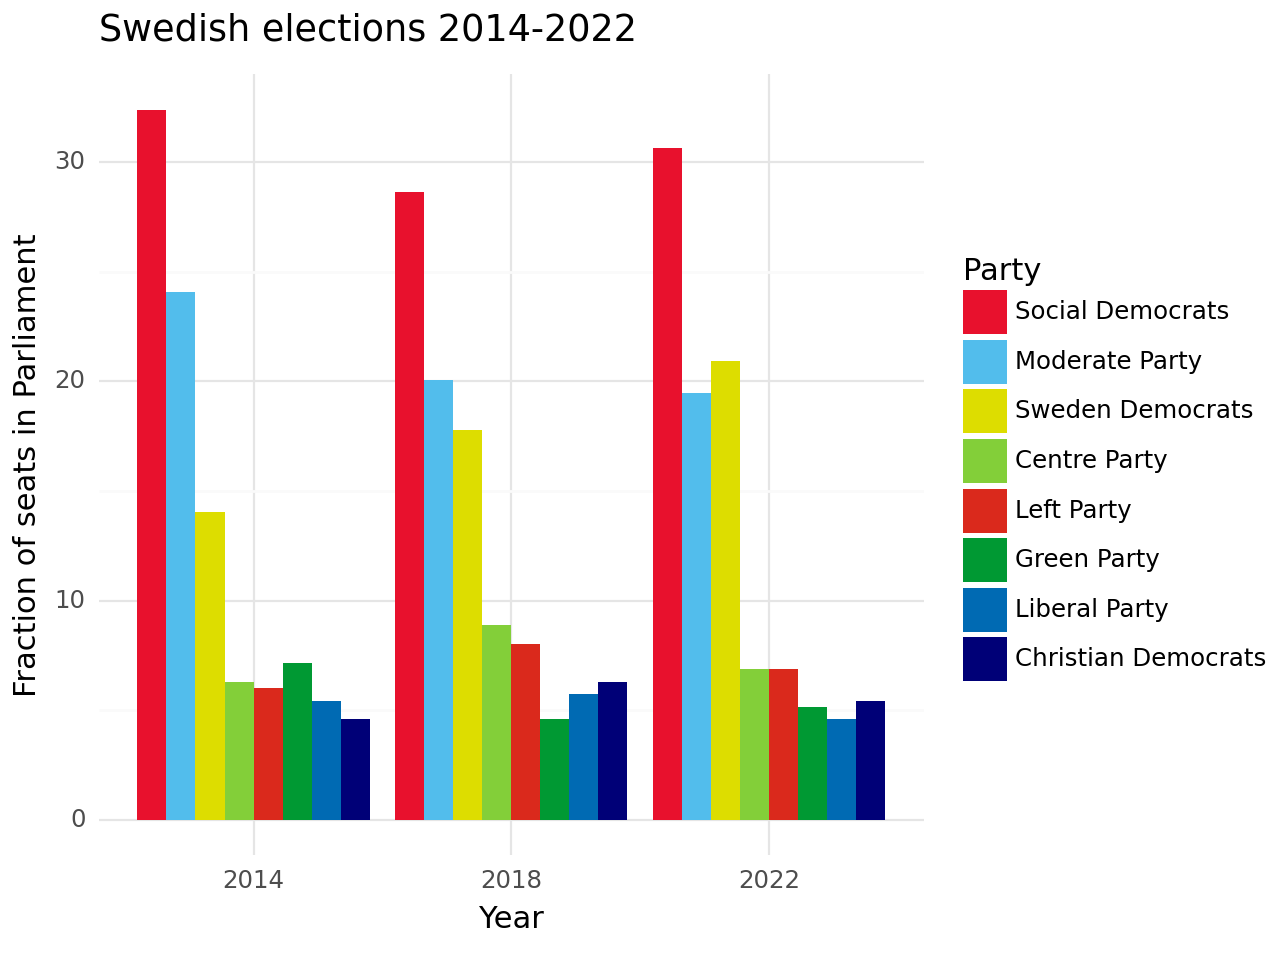

<Figure Size: (640 x 480)>

In [16]:
data_election = data_election.assign(Party = pd.Categorical(data_election["Party"], 
                                                           categories=["Social Democrats", "Moderate Party", "Sweden Democrats", "Centre Party", "Left Party", "Green Party", "Liberal Party", "Christian Democrats"]))

p = (ggplot(data_election, aes("Year", "Frac_seats", fill = "Party"))
    + geom_bar(stat = "identity", position="dodge")
    + scale_fill_manual(values = color_use[::-1])
    + labs(y = "Fraction of seats in Parliament", x= "Year", title = "Swedish elections 2014-2022")
    + theme_minimal())

p.save("Figs/Election_year_next.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300)
p

Stacked diagrams are not always bad, it always depend on the context. For example, below, the main goal is to highlight that Asia has a growing economy. 

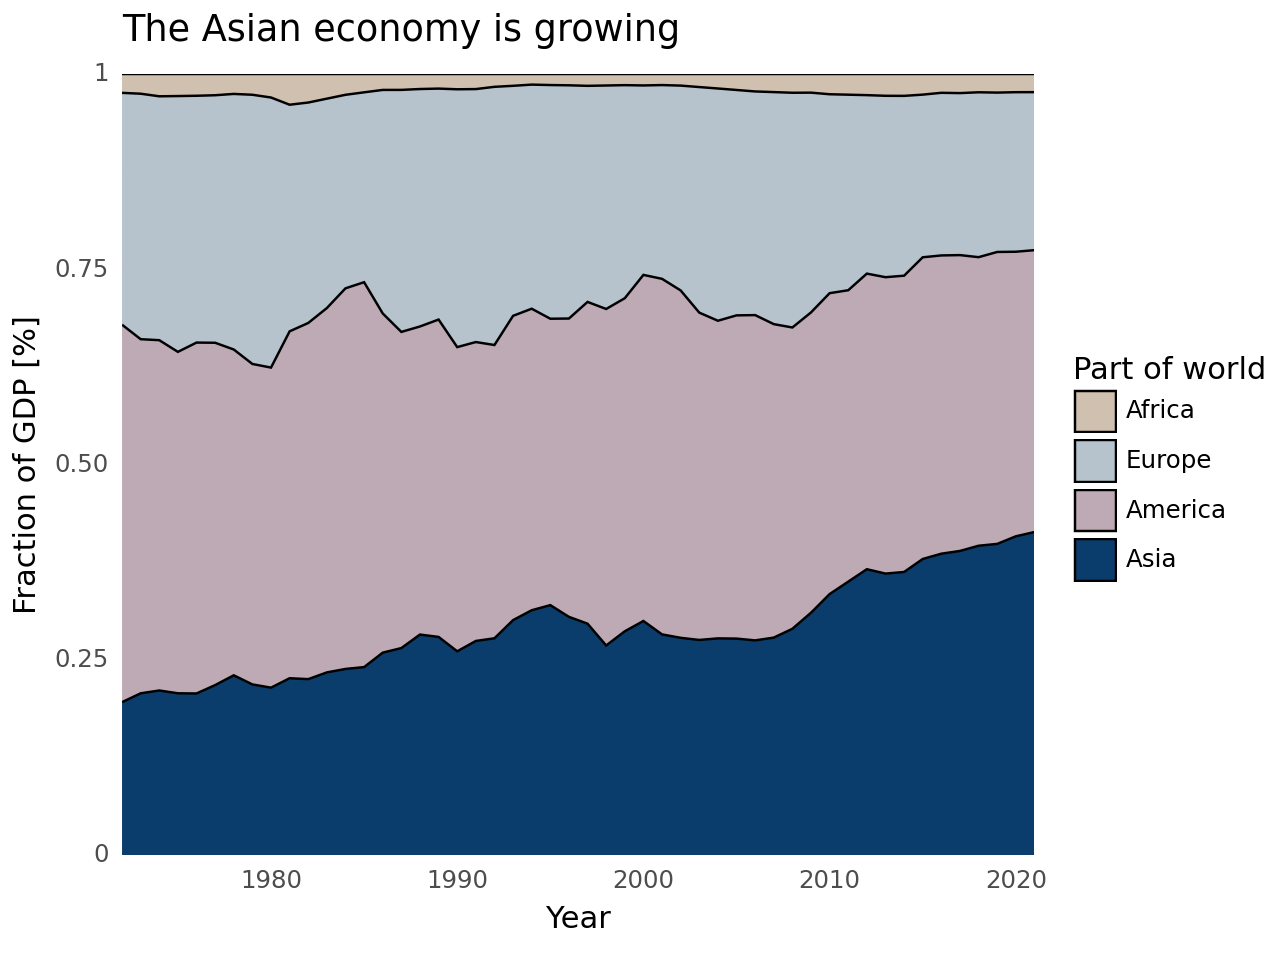

<Figure Size: (640 x 480)>

In [17]:
data_gdp = pd.read_csv("Data/GDP_tidy.csv")
data_gdp = data_gdp.assign(part_of_world = pd.Categorical(data_gdp["part_of_world"], 
                                                           categories=["Asia", "America", "Europe", "Africa"][::-1]))
col_highlight = ["#D0C0B0", "#B6C2CC", "#BEAAB4", "#0A3D6B", "#ECE9CD", "#0D5C3D", "#812F02"]

p = (ggplot(data_gdp, aes(x="year", y="GDP", fill = "part_of_world")) 
  + geom_density(stat="identity", position = "fill") 
  + xlim(1971, 2021) 
  + labs(x = "Year", y = "Fraction of GDP [%]", title = "The Asian economy is growing")
  + scale_x_continuous(expand = (0, 0))
  + scale_y_continuous(expand = (0, 0))
  + scale_fill_manual(values = col_highlight, name = "Part of world") 
  + theme_minimal())

p.save("Figs/Asian_economy.png", dpi=300, width=BASE_WIDTH, height=BASE_HEIGHT)
p

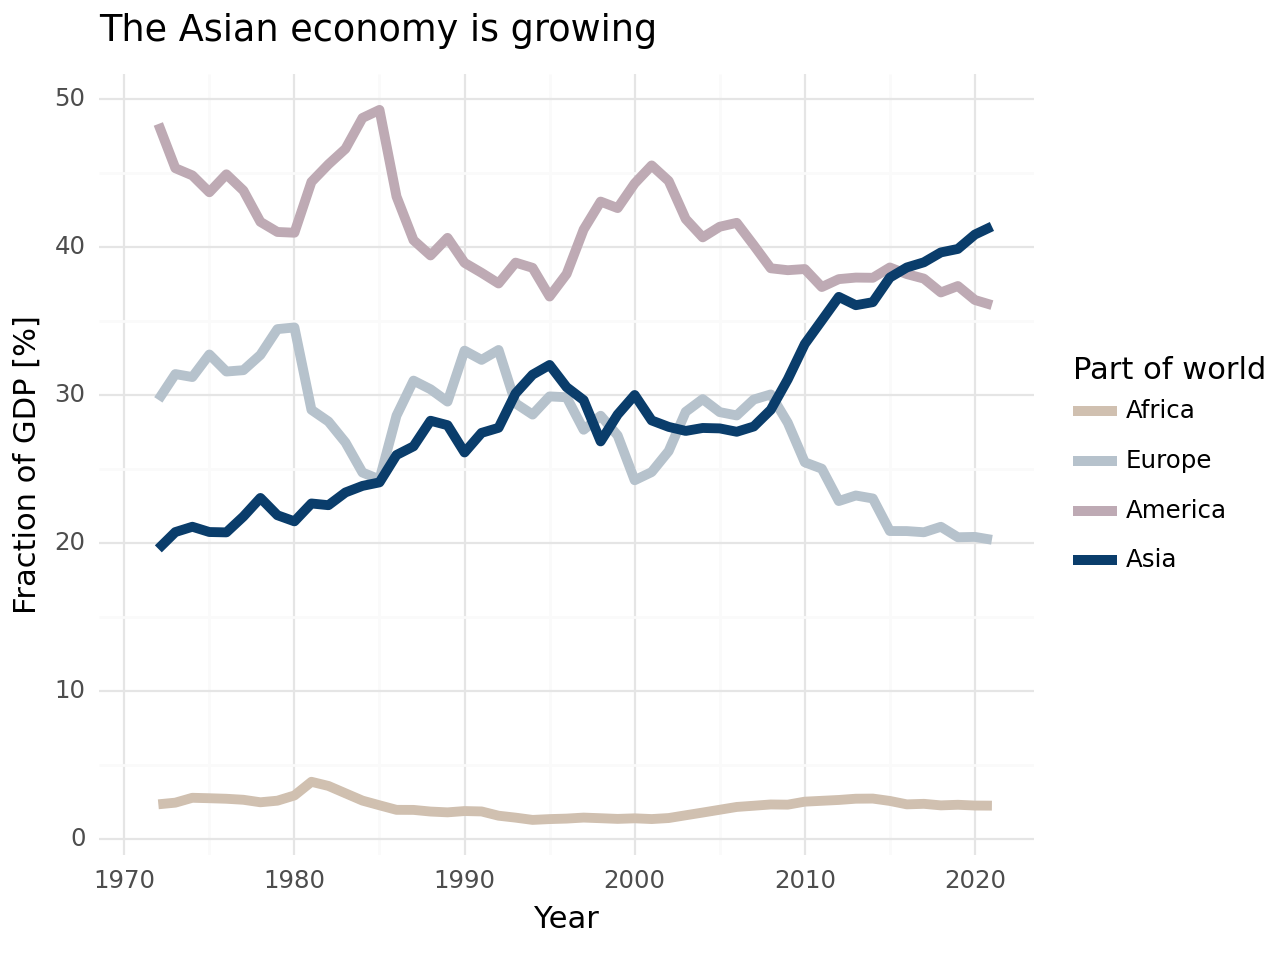

<Figure Size: (640 x 480)>

In [18]:
(ggplot(data_gdp, aes(x="year", y="frac_gdp", color = "part_of_world")) 
  + geom_line(size=2.0)
  + xlim(1971, 2021) 
  + labs(x = "Year", y = "Fraction of GDP [%]", title = "The Asian economy is growing")
  + scale_color_manual(values = col_highlight, name = "Part of world") 
  + theme_minimal())

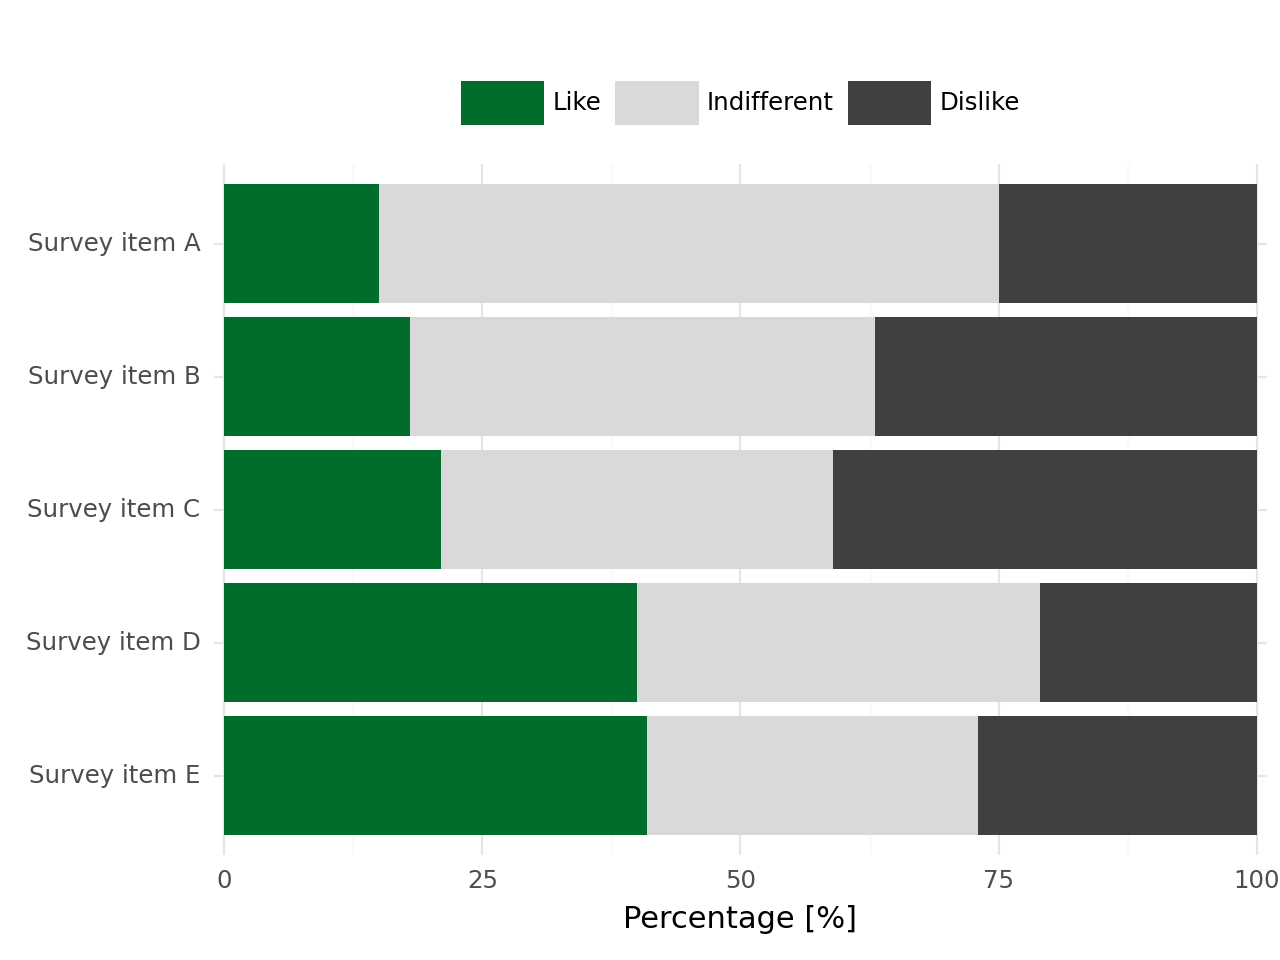

<Figure Size: (640 x 480)>

In [19]:
# Made up dataset 
itemA = pd.DataFrame({"Item" : "Survey item A", 
                      "proportion" : [15, 60, 100-(15+60)], 
                      "category" : ["Like", "Indifferent", "Dislike"]})
itemB = pd.DataFrame({"Item" : "Survey item B", 
                      "proportion" : [18, 45, 100-(18+45)], 
                      "category" : ["Like", "Indifferent", "Dislike"]})
itemC = pd.DataFrame({"Item" : "Survey item C", 
                      "proportion" : [21, 38, 100-(21+38)], 
                      "category" : ["Like", "Indifferent", "Dislike"]})
itemD = pd.DataFrame({"Item" : "Survey item D", 
                      "proportion" : [40, 39, 100-(39+40)], 
                      "category" : ["Like", "Indifferent", "Dislike"]})
itemE = pd.DataFrame({"Item" : "Survey item E", 
                      "proportion" : [41, 32, 100-(41+32)], 
                      "category" : ["Like", "Indifferent", "Dislike"]})

colors_use = ["#404040", "#d9d9d9", "#006d2c"][::-1]
data_plot = pd.concat([itemA, itemB, itemC, itemD, itemE])

data_plot = data_plot.assign(Item = pd.Categorical(data_plot["Item"], 
                                                   categories=["Survey item E", "Survey item D", "Survey item C", "Survey item B", "Survey item A"]))

p = (ggplot(data_plot, aes("Item", "proportion", fill="category"))
    + geom_bar(stat="identity")
    + scale_y_continuous(expand=(0.01, 0.01))
    + scale_fill_manual(values=colors_use, name = " ", limits = ["Like", "Indifferent", "Dislike"])
    + coord_flip()
    + labs(x = "", y = "Percentage [%]")
    + theme_minimal()
    + theme(legend_position="top", 
            legend_key_width=30))

p.save("Figs/Stacked_discrete_good.png", dpi=300, width=BASE_WIDTH, height=BASE_HEIGHT)
p

In [20]:
# Made up more detailed dataset 
itemA = pd.DataFrame({"Item" : "Survey item A", 
                      "proportion" : [7, 8, 35, 25, 100-()], 
                      "category" : ["Strongly Like", "Like", "Strongly Dislike", "Neutral"]})
itemB = pd.DataFrame({"Item" : "Survey item B", 
                      "proportion" : [18, 45, 100-(18+45)], 
                      "category" : ["Like", "Indifferent", "Dislike"]})
itemC = pd.DataFrame({"Item" : "Survey item C", 
                      "proportion" : [21, 38, 100-(21+38)], 
                      "category" : ["Like", "Indifferent", "Dislike"]})
itemD = pd.DataFrame({"Item" : "Survey item D", 
                      "proportion" : [40, 39, 100-(39+40)], 
                      "category" : ["Like", "Indifferent", "Dislike"]})
itemE = pd.DataFrame({"Item" : "Survey item E", 
                      "proportion" : [41, 32, 100-(41+32)], 
                      "category" : ["Like", "Indifferent", "Dislike"]})

colors_use = ["#404040", "#d9d9d9", "#006d2c"][::-1]
data_plot = pd.concat([itemA, itemB, itemC, itemD, itemE])

data_plot = data_plot.assign(Item = pd.Categorical(data_plot["Item"], 
                                                   categories=["Survey item E", "Survey item D", "Survey item C", "Survey item B", "Survey item A"]))

p = (ggplot(data_plot, aes("Item", "proportion", fill="category"))
    + geom_bar(stat="identity")
    + scale_y_continuous(expand=(0.01, 0.01))
    + scale_fill_manual(values=colors_use, name = " ", limits = ["Like", "Indifferent", "Dislike"])
    + coord_flip()
    + labs(x = "", y = "Percentage [%]")
    + theme_minimal()
    + theme(legend_position="top", 
            legend_key_width=30))

p.save("Figs/Stacked_discrete_good.png", dpi=300, width=BASE_WIDTH, height=BASE_HEIGHT)
p

TypeError: unsupported operand type(s) for -: 'int' and 'tuple'

Are there other ways we can deal with stacked densities? Yes, by using facets.

/home/sebpe/anaconda3/envs/MVE080/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 7.0 x 5 in image.
/home/sebpe/anaconda3/envs/MVE080/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: Figs/Education_stacked.png


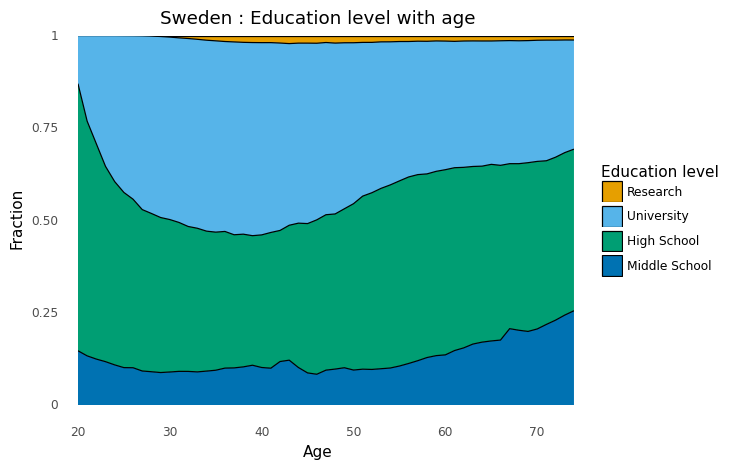

<ggplot: (8764487869483)>

In [ ]:
data_education_plot = pd.read_csv("Data/Education_plot_format.csv")

data_plot = data_education_plot.query("highlight == 'Highlighted group'")
data_plot = data_plot.assign(Education_level = pd.Categorical(data_plot["Education_level"], 
                                                              categories=["Middle School", "High School", "University", "Research"][::-1]))

p = (ggplot(data_plot, aes(x="age", y="Count_var", fill = "Education_level")) 
  + geom_density(stat="identity", position = "fill") 
  + labs(x = "Age", y = "Fraction", title = "Sweden : Education level with age")
  + scale_x_continuous(expand = (0, 0))
  + scale_y_continuous(expand = (0, 0))
  + scale_fill_manual(values = cbPalette, name = "Education level") 
  + theme_minimal())

p.save("Figs/Education_stacked.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300)
p

/home/sebpe/anaconda3/envs/MVE080/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 7.0 x 5 in image.
/home/sebpe/anaconda3/envs/MVE080/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: Figs/Education_line.png


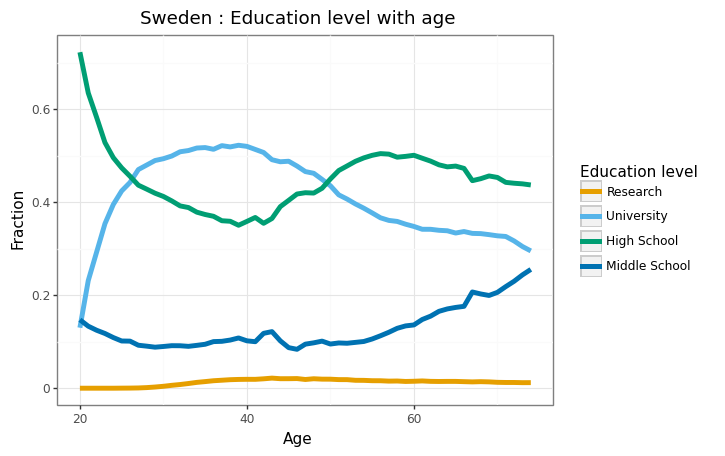

<ggplot: (8764483692301)>

In [ ]:
p = (ggplot(data_plot, aes(x="age", y="Frac_edu", color = "Education_level")) 
  + geom_line(size=2.0)
  + labs(x = "Age", y = "Fraction", title = "Sweden : Education level with age")
  + scale_color_manual(values = cbPalette, name = "Education level") 
  + theme_bw())

p.save("Figs/Education_line.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300)
p


/home/sebpe/anaconda3/envs/MVE080/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 14.0 x 5 in image.
/home/sebpe/anaconda3/envs/MVE080/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: Figs/Education_count.png


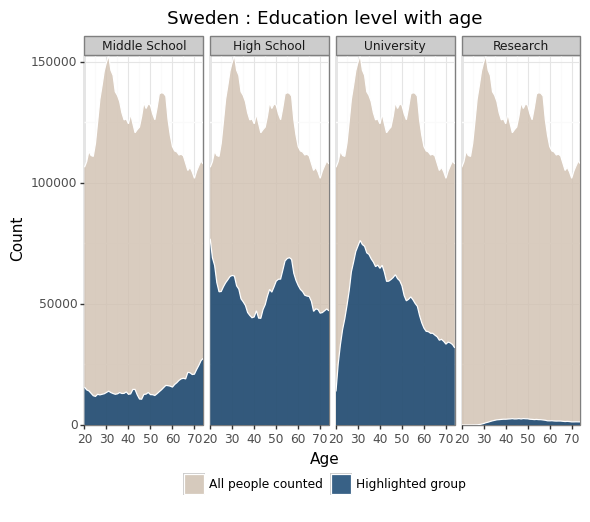

<ggplot: (8768644297518)>

In [ ]:
data_education_plot = data_education_plot.assign(Education_level = pd.Categorical(data_education_plot["Education_level"], 
                                                           categories=["Middle School", "High School", "University", "Research"]))

col_highlight = ["#D0C0B0", "#0A3D6B", "#ECE9CD", "#0D5C3D", "#812F02"]
p = (ggplot(data_education_plot, aes(x="age", y="Count_var", fill = "highlight")) 
  + geom_density(stat = "identity", alpha=0.8, color="White") 
  + facet_wrap("~Education_level", nrow=1) 
  + scale_fill_manual(values=col_highlight, name = " ")
  + labs(x = "Age", y = "Count", title = "Sweden : Education level with age")
  + scale_y_continuous(expand = (0, 0))
  + scale_x_continuous(expand = (0, 0))
  + theme_bw()
  + theme(legend_position="bottom", 
          legend_background = element_blank()))

p.save("Figs/Education_count.png", width=BASE_WIDTH*2, height=BASE_HEIGHT, dpi=300)
p

/home/sebpe/anaconda3/envs/MVE080/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 14.0 x 5 in image.
/home/sebpe/anaconda3/envs/MVE080/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: Figs/Education_frac.png


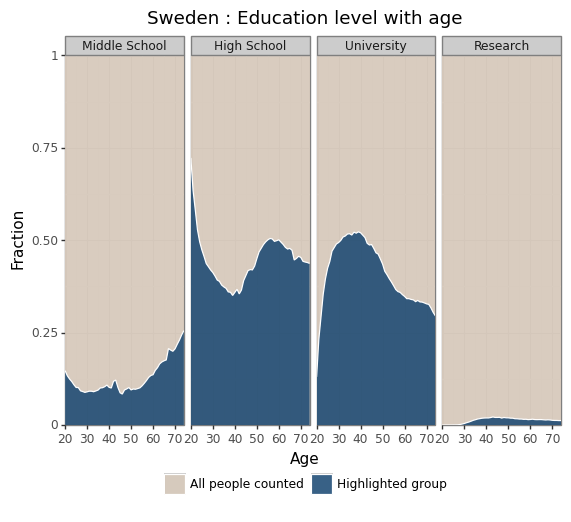

<ggplot: (8768646662882)>

In [ ]:
p = (ggplot(data_education_plot, aes(x="age", y="Frac_edu", fill = "highlight")) 
  + geom_density(stat = "identity", alpha=0.8, color="White") 
  + facet_wrap("~Education_level", nrow=1) 
  + scale_fill_manual(values=col_highlight, name = " ")
  + labs(x = "Age", y = "Fraction", title = "Sweden : Education level with age")
  + scale_y_continuous(expand = (0, 0))
  + scale_x_continuous(expand = (0, 0))
  + theme_bw()
  + theme(legend_position="bottom", 
          legend_background = element_blank()))

p.save("Figs/Education_frac.png", width=BASE_WIDTH*2, height=BASE_HEIGHT, dpi=300)
p

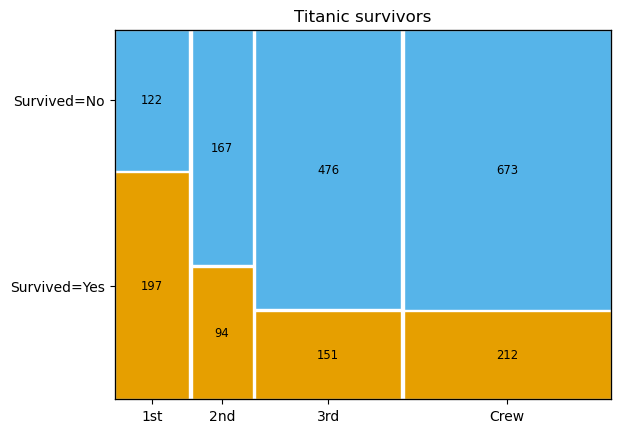

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic


data_plot = {('1st', 'Survived=Yes'): 57 + 140, 
             ('2nd', 'Survived=Yes'): 14 + 80, 
             ('3rd', 'Survived=Yes'): 75 + 76, 
             ('Crew', 'Survived=Yes'): 192 + 20,
             ('1st', 'Survived=No'): 118 + 4, 
             ('2nd', 'Survived=No'): 154 + 13, 
             ('3rd', 'Survived=No'): 387 + 89, 
             ('Crew', 'Survived=No'): 670 + 3}

props={}
props[('1st', 'Survived=Yes')]={'facecolor': cbPalette[0], 'edgecolor':'white'}
props[('2nd', 'Survived=Yes')]={'facecolor': cbPalette[0], 'edgecolor':'white'}
props[('3rd', 'Survived=Yes')]={'facecolor': cbPalette[0], 'edgecolor':'white'}
props[('Crew', 'Survived=Yes')]={'facecolor': cbPalette[0], 'edgecolor':'white'}
props[('1st', 'Survived=No')]={'facecolor': cbPalette[1], 'edgecolor':'white'}
props[('2nd', 'Survived=No')]={'facecolor': cbPalette[1], 'edgecolor':'white'}
props[('3rd', 'Survived=No')]={'facecolor': cbPalette[1], 'edgecolor':'white'}
props[('Crew', 'Survived=No')]={'facecolor': cbPalette[1], 'edgecolor':'white'}

labelizer=lambda k:data_plot[k]

mosaic(data_plot, title="Titanic survivors", properties=props, labelizer=labelizer)


plt.savefig("Figs/Mosaic.png", dpi=300)
plt.show()

Teaser for next lecture on associations and time-series.

/home/sebpe/anaconda3/envs/MVE080/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 7.0 x 5 in image.
/home/sebpe/anaconda3/envs/MVE080/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: Figs/Spain_unemployment.png


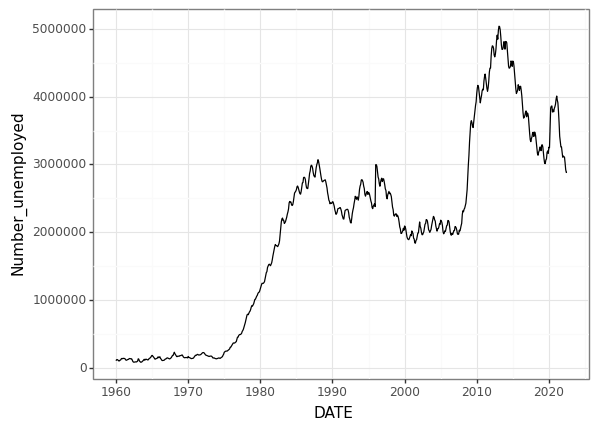

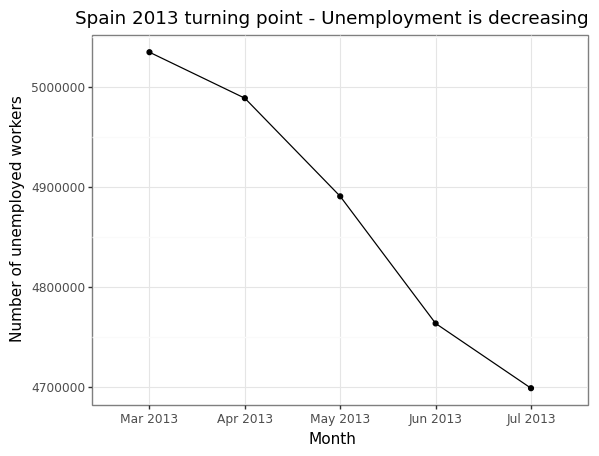

[<ggplot: (8728049454237)>, <ggplot: (8728049457616)>]

In [ ]:
from mizani.breaks import date_breaks
from mizani.formatters import date_format

data_spain = pd.read_csv("Data/Spain_tidy.csv")
# Make sure the the dates column is handled as datatime (Pandas approach to handling dates)
data_spain = data_spain.assign(DATE=pd.to_datetime(data_spain["DATE"]))



p1 = (ggplot(data_spain, aes("DATE", "Number_unemployed"))
    + geom_line()
    + scale_x_datetime(breaks=date_breaks('10 years'), labels=date_format('%Y'))
    + theme_bw())

# By some reason plotnine has a bug with handling dates for the 2013 dataset, but it handles the above case great (p1). 
# To get a proper plot the below solution is a really hacky solution.
data_2013 = data_spain.query("(Year == 2013) and (Month > 2 and Month < 8)")
data_2013 = data_2013.assign(DATE_fct=pd.Categorical(["Mar 2013", "Apr 2013", "May 2013", "Jun 2013", "Jul 2013"], 
                                                      categories=["Mar 2013", "Apr 2013", "May 2013", "Jun 2013", "Jul 2013"]) )
data_2013 = data_2013.assign(group=[1, 1, 1, 1, 1])


p2 = (ggplot(data_2013, aes("DATE_fct", "Number_unemployed", group="group"))
    + geom_point()
    + geom_line()
    + labs(x = "Month", y = "Number of unemployed workers", title = "Spain 2013 turning point - Unemployment is decreasing")
    + theme_bw())

p2.save("Figs/Spain_unemployment.png", width=BASE_WIDTH, height=BASE_HEIGHT)

[p1, p2]